# JWST Tutorial

In this tutorial we will try to download some publically available data from JWST and fit it with chromatic! We will use the early release NIRISS [observations of WASP-96](https://www.stsci.edu/jwst/science-execution/approved-programs/webb-first-image-observations) as in the [chromatic quickstart tutorial](https://zkbt.github.io/chromatic/quickstart/). You'll need to retrieve the HAT-P-18 files [here](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html?searchQuery=%7B%22service%22%3A%22CAOMFILTERED%22%2C%22inputText%22%3A%5B%7B%22paramName%22%3A%22obs_collection%22%2C%22niceName%22%3A%22obs_collection%22%2C%22values%22%3A%5B%22JWST%22%5D%2C%22valString%22%3A%22JWST%22%2C%22isDate%22%3Afalse%2C%22separator%22%3A%22%3B%22%2C%22facetType%22%3A%22discrete%22%2C%22displayString%22%3A%22JWST%22%7D%2C%7B%22paramName%22%3A%22proposal_id%22%2C%22niceName%22%3A%22proposal_id%22%2C%22values%22%3A%5B%5D%2C%22valString%22%3A%222734%22%2C%22isDate%22%3Afalse%2C%22freeText%22%3A%222734%22%2C%22displayString%22%3A%222734%22%7D%5D%2C%22position%22%3A%22undefined%2C%20undefined%2C%20undefined%22%2C%22paramsService%22%3A%22Mast.Caom.Filtered%22%2C%22title%22%3A%22MAST%3A%20%20Advanced%20Search%2017%22%2C%22tooltip%22%3A%22JWST%3B%202734%3B%20%22%2C%22columns%22%3A%22*%22%2C%22columnsConfig%22%3A%22Mast.Caom.Cone%22%7D) and save them somewhere handy on your computer.

- To start this tutorial you can (optionally) create a new conda environment:

    `conda create -n jwst_tutorial python=3.9`

    `conda activate jwst_tutorial`


- To install `chromatic` **only** you need to run:

    `pip install chromatic-lightcurves`


- Or you can install `chromatic-fitting` (which will install `chromatic` as one of its requirements):

    `pip install chromatic-lightcurves`

# chromatic

In [1]:
from chromatic import *

In [2]:
from astroquery.mast import Observations

In [ ]:
Observations.download_file(
    f"mast:JWST/product/jw02734-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits"
);

In [ ]:
fits.open('jw02734-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits')["PRIMARY"].header['CAL_VER']

In [3]:
jwst_dir = "jwst_data"

# # files for WASP-96
# # WARNING: the current version (1.7.2) on MAST has a different version type (1.5.3) for 3rd file!
# targ = "WASP-96"
# wasp96_v1_7_2 = f"{jwst_dir}/{targ}/jw02734002001_04101_00001-seg00*_nis/jw02734002001_04101_00001-seg00*_nis_x1dints.fits"
# wasp96_v1_5_3 = f"{jwst_dir}/{targ}/jw02734/jw02734002001/*x1dints.fits"

# # files for WASP-39
# targ = "WASP-39"
# wasp39_eureka = f"{jwst_dir}/{targ}/S3_wasp39b_ap6_bg7_SpecData.h5"
# wasp39 = f"{jwst_dir}/{targ}/jw01366001001_04101_00001-seg00*_nis/*x1dints.fits"

# # files for HAT-P-18
# targ = "HAT-P-18"
# hatp18 = f"{jwst_dir}/{targ}/jw02734001001_04101_00001-seg00*_nis/*x1dints.fits"
# hatp18_stitch = f"{jwst_dir}/{targ}/jw02734-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits"

# rainbow = read_rainbow(wasp39_eureka)

rainbow = read_rainbow("jw02734-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits")

🌈🤖 This file contains data for 3 spectrosopic orders. Because no
`order=` keyword was supplied, we're defaulting to first order. You can
hide this warning by expliciting stating which order you want to load.
For this file, the options include [1 2 3].



  0%|          | 0/469 [00:00<?, ?it/s]

🌈🤖 The 2048 input wavelengths were not monotonically increasing.
<🌈(2048w, 469t)> has been sorted from lowest to highest wavelength.
If you want to recover the original wavelength order, the original
wavelength indices are available in `rainbow.original_wave_index`.



In [4]:
rainbow

<🌈(2048w, 469t)>

In [5]:
rainbow.wavelength

<Quantity [0.84619656, 0.8470795 , 0.84796257, ..., 2.83119683, 2.83220758,
           2.83321843] micron>

In [6]:
rainbow.time

<Quantity [2459743.69672653, 2459743.6973623 , 2459743.69799807,
           2459743.69863384, 2459743.69926961, 2459743.69990538,
           2459743.70054115, 2459743.70117692, 2459743.70181269,
           2459743.70244846, 2459743.70308423, 2459743.70372   ,
           2459743.70435578, 2459743.70499155, 2459743.70562732,
           2459743.70626309, 2459743.70689886, 2459743.70753463,
           2459743.7081704 , 2459743.70880617, 2459743.70944194,
           2459743.71007771, 2459743.71071348, 2459743.71134925,
           2459743.71198503, 2459743.7126208 , 2459743.71325657,
           2459743.71389234, 2459743.71452811, 2459743.71516388,
           2459743.71579965, 2459743.71643542, 2459743.71707119,
           2459743.71770696, 2459743.71834273, 2459743.7189785 ,
           2459743.71961427, 2459743.72025005, 2459743.72088582,
           2459743.72152159, 2459743.72215736, 2459743.72279313,
           2459743.7234289 , 2459743.72406467, 2459743.72470044,
           2459743.725336

In [7]:
rainbow.flux

<Quantity [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]] Jy>

In [8]:
rainbow.uncertainty

<Quantity [[1.17644446e-11, 1.10551025e-11, 1.09439203e-11, ...,
            9.14411041e-12, 8.40111408e-12, 8.10466721e-12],
           [3.12609377e-11, 2.93760464e-11, 2.90806087e-11, ...,
            3.31106029e-11, 3.04202312e-11, 2.93468042e-11],
           [3.23022989e-11, 3.03546183e-11, 3.00493390e-11, ...,
            3.44670515e-11, 3.16664628e-11, 3.05490605e-11],
           ...,
           [9.41709297e-09, 8.84928543e-09, 8.76028731e-09, ...,
            9.25328972e-09, 8.50142213e-09, 8.20143572e-09],
           [1.95308069e-08, 1.83531888e-08, 1.81686090e-08, ...,
            1.63304046e-08, 1.50034925e-08, 1.44740700e-08],
           [5.18773628e-08, 4.87493956e-08, 4.82591182e-08, ...,
            5.80900553e-08, 5.33700010e-08, 5.14867543e-08]] Jy>

🌈🤖 The wavelength scale for this rainbow is '?',
and there are 2048 wavelength centers and
2048 wavelength edges defined.

It's hard to imshow something with a wavelength axis
that isn't linearly or logarithmically uniform, or doesn't
at least have its wavelength edges defined. We're giving up
and just using the wavelength index as the wavelength axis.

If you want a real wavelength axis, one solution would
be to bin your wavelengths to a more uniform grid with
`rainbow.bin(R=...)` (for logarithmic wavelengths) or
`rainbow.bin(dw=...)` (for linear wavelengths)



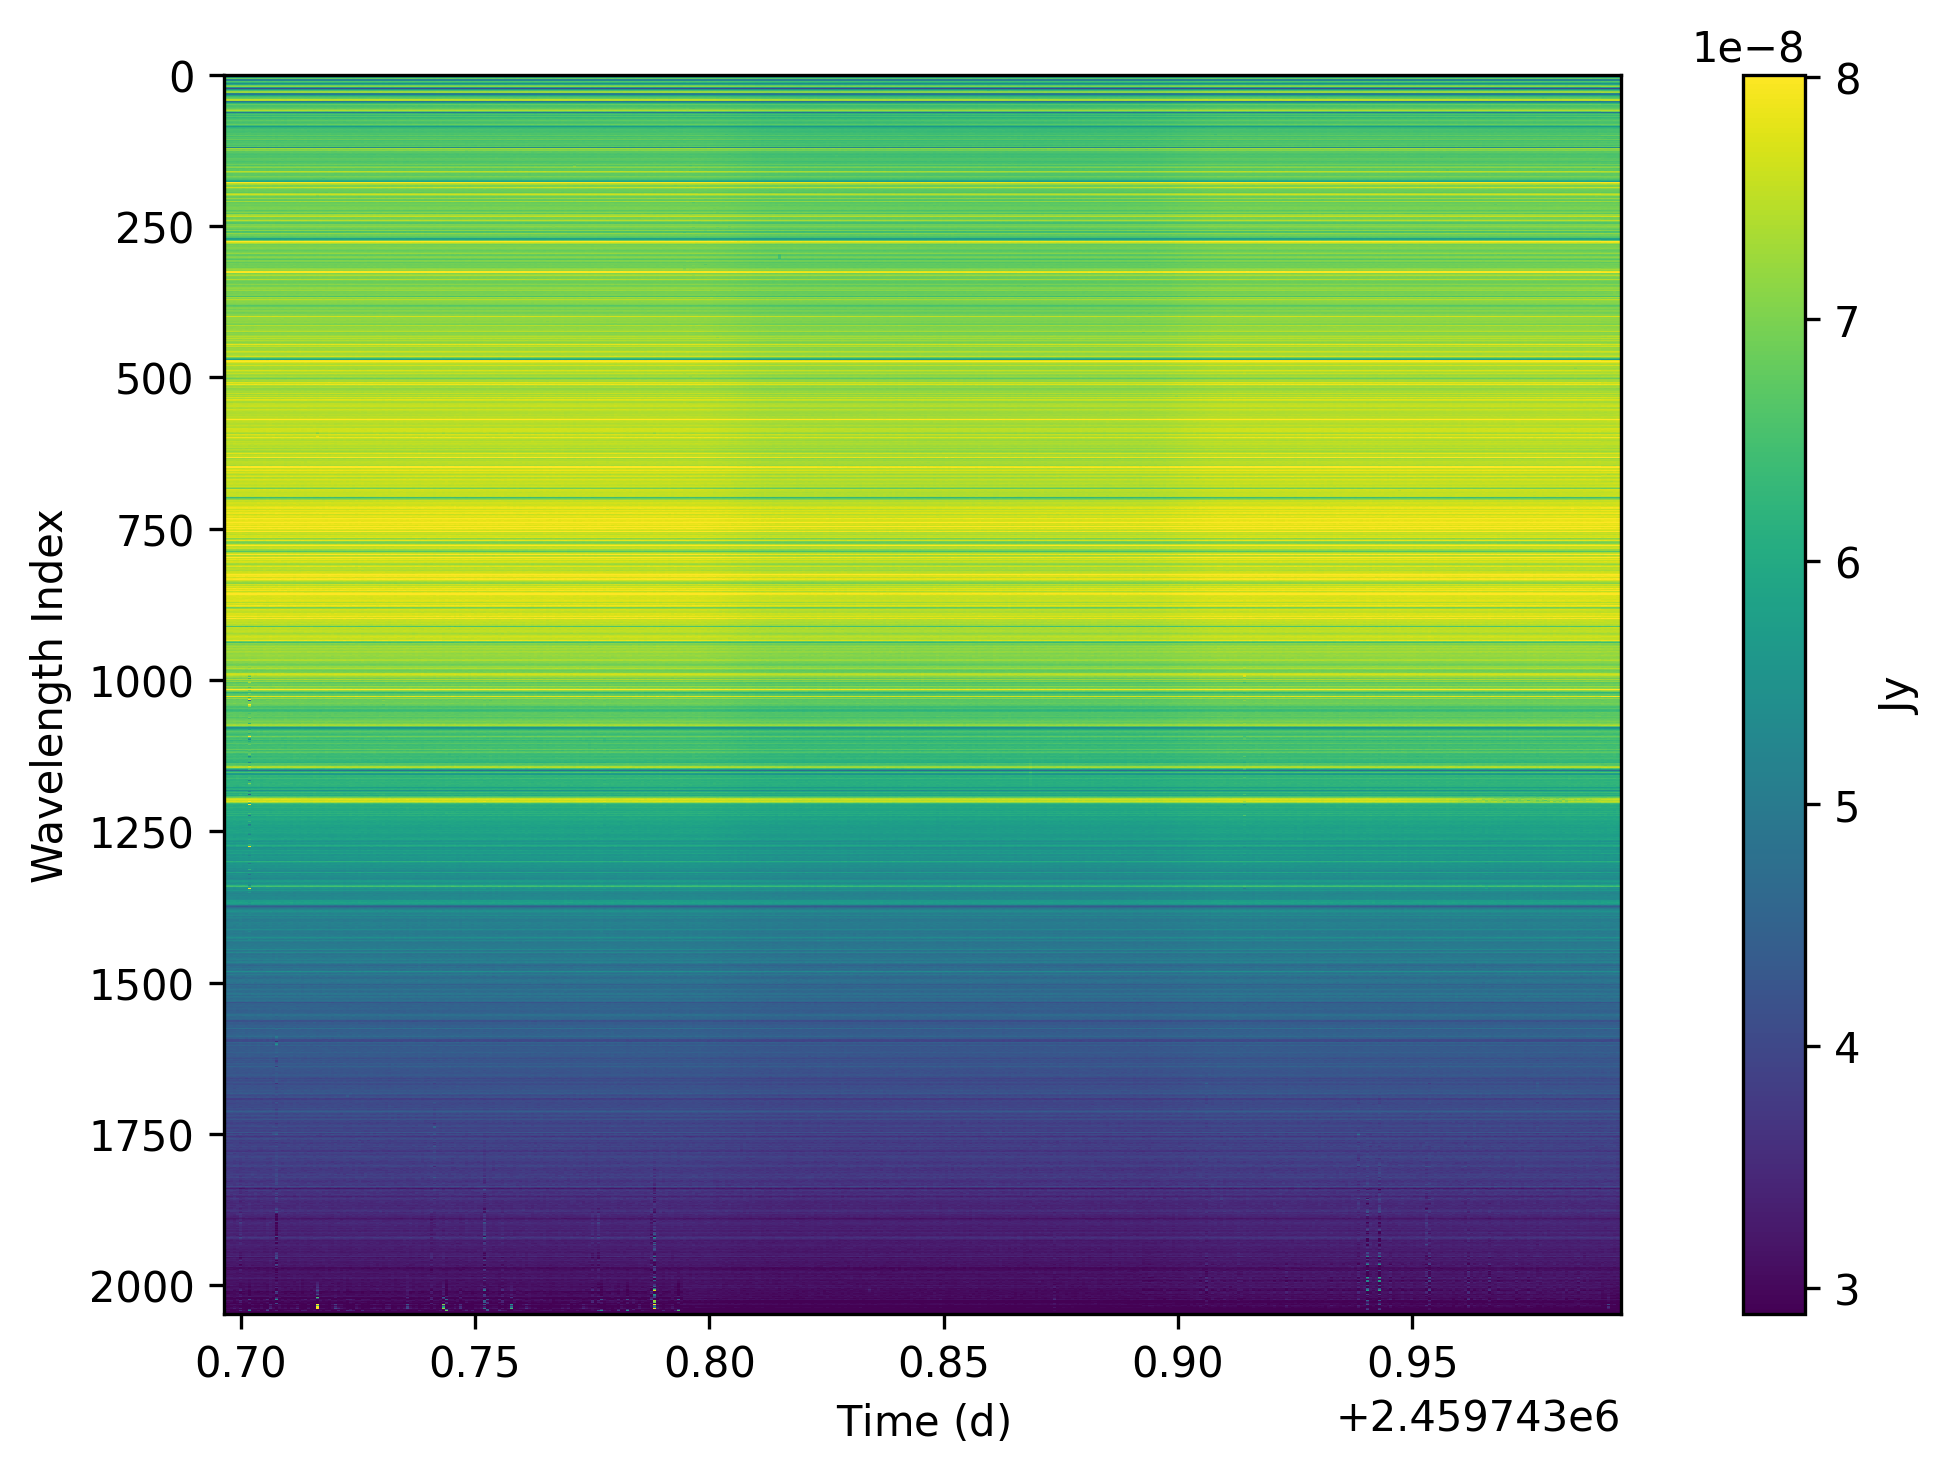

In [9]:
# rainbow.wavelike["ok"] = rainbow.wavelength.to_value("micron") > 1.2
# rainbow.timelike["ok"] = rainbow.time.to_value("d") < 2459751.85
rainbow.trim().imshow();

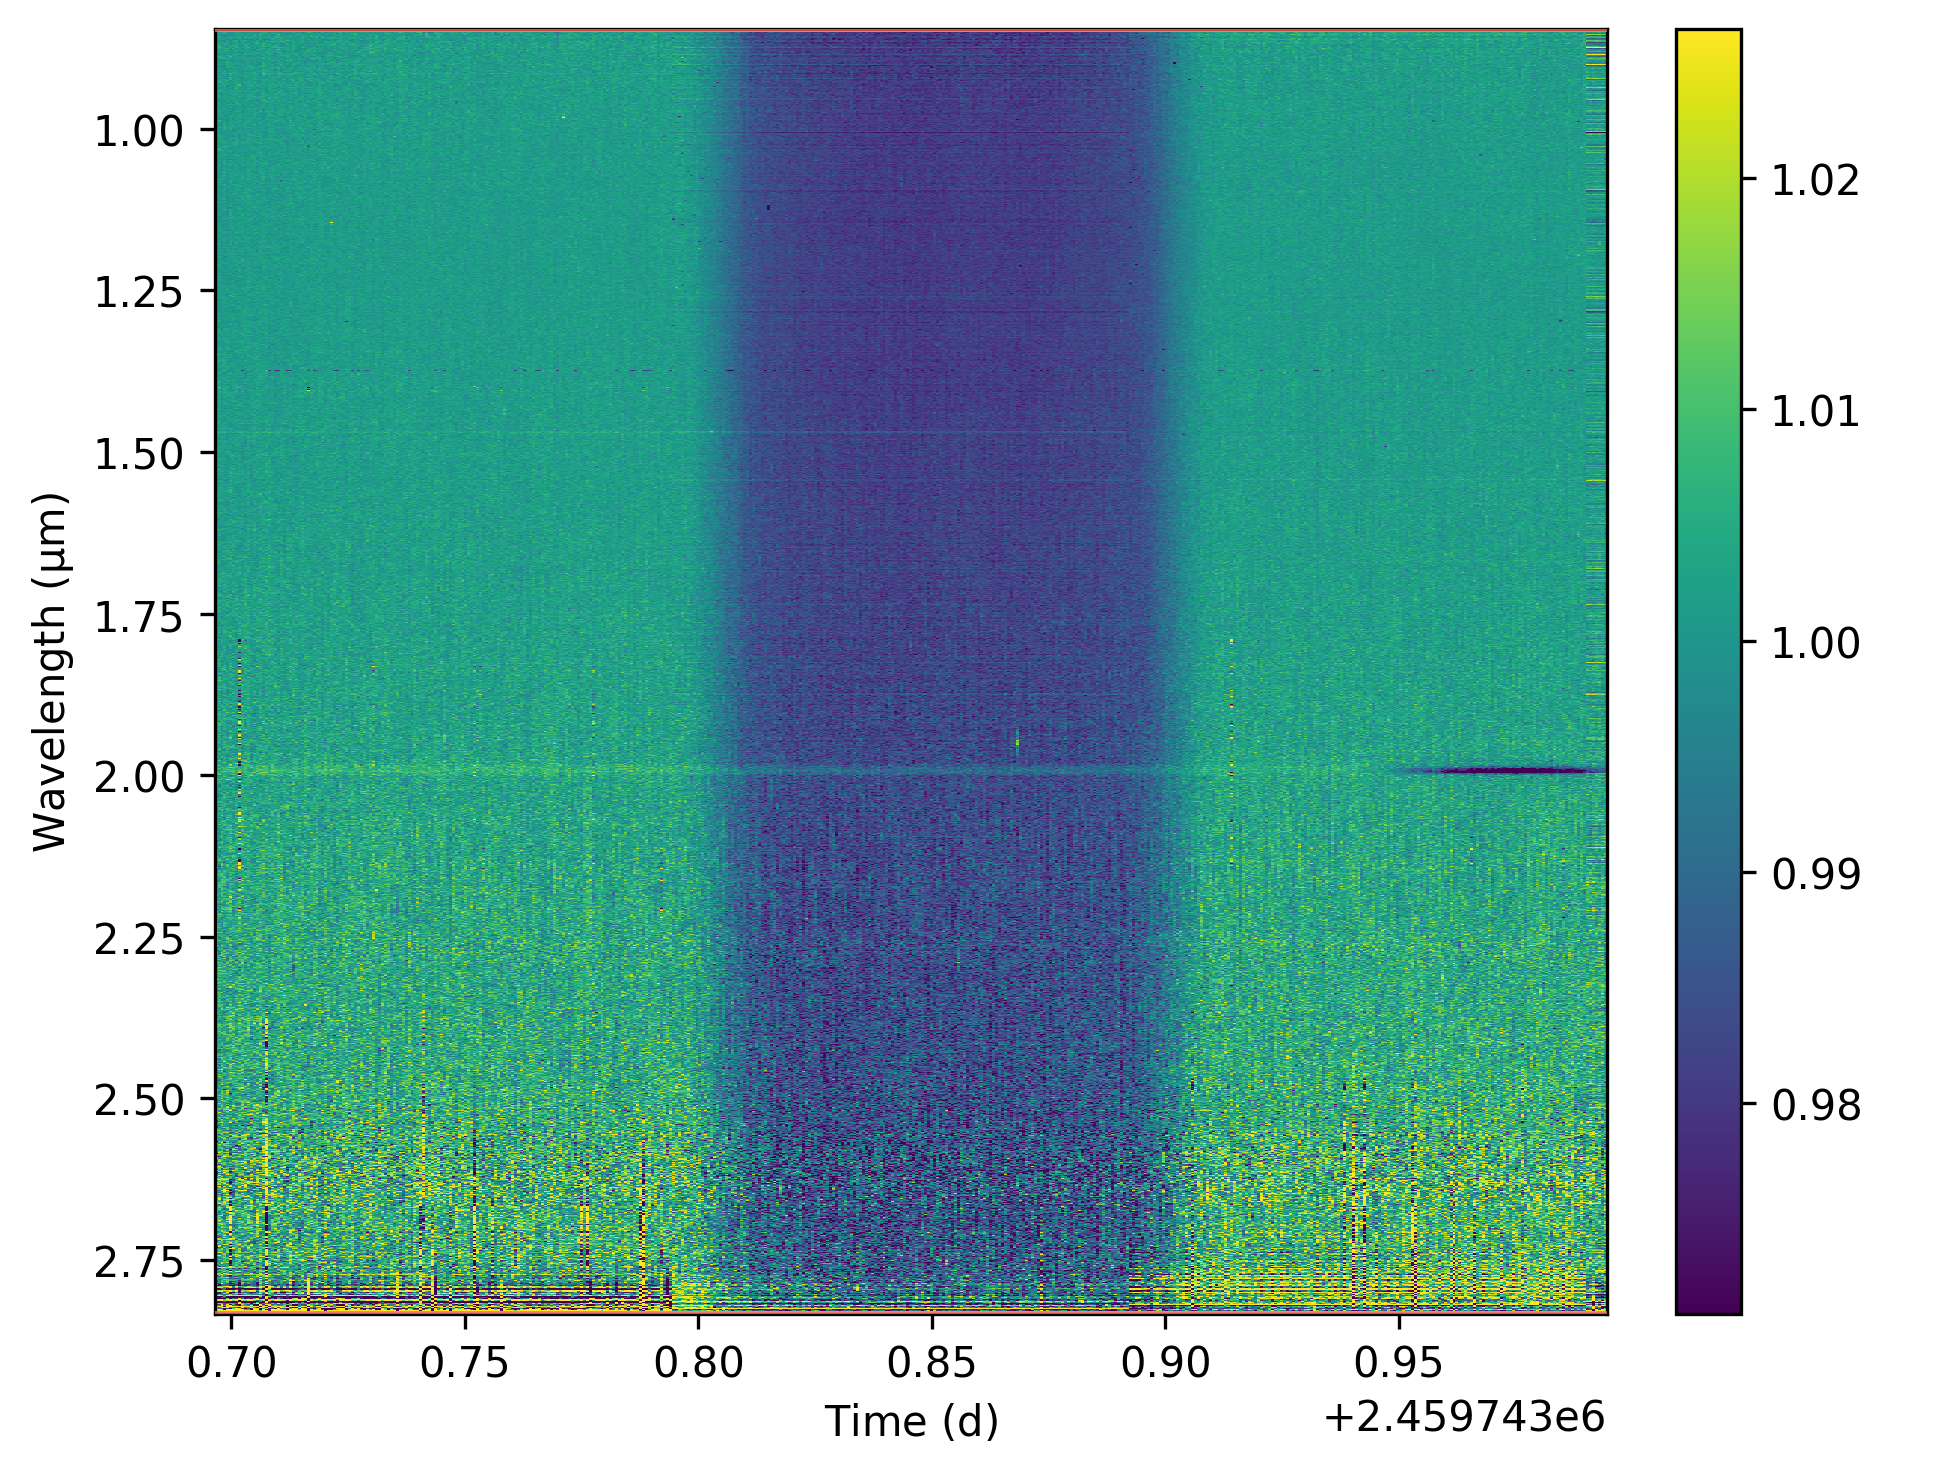

In [10]:
rainbow.trim().normalize().pcolormesh();

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

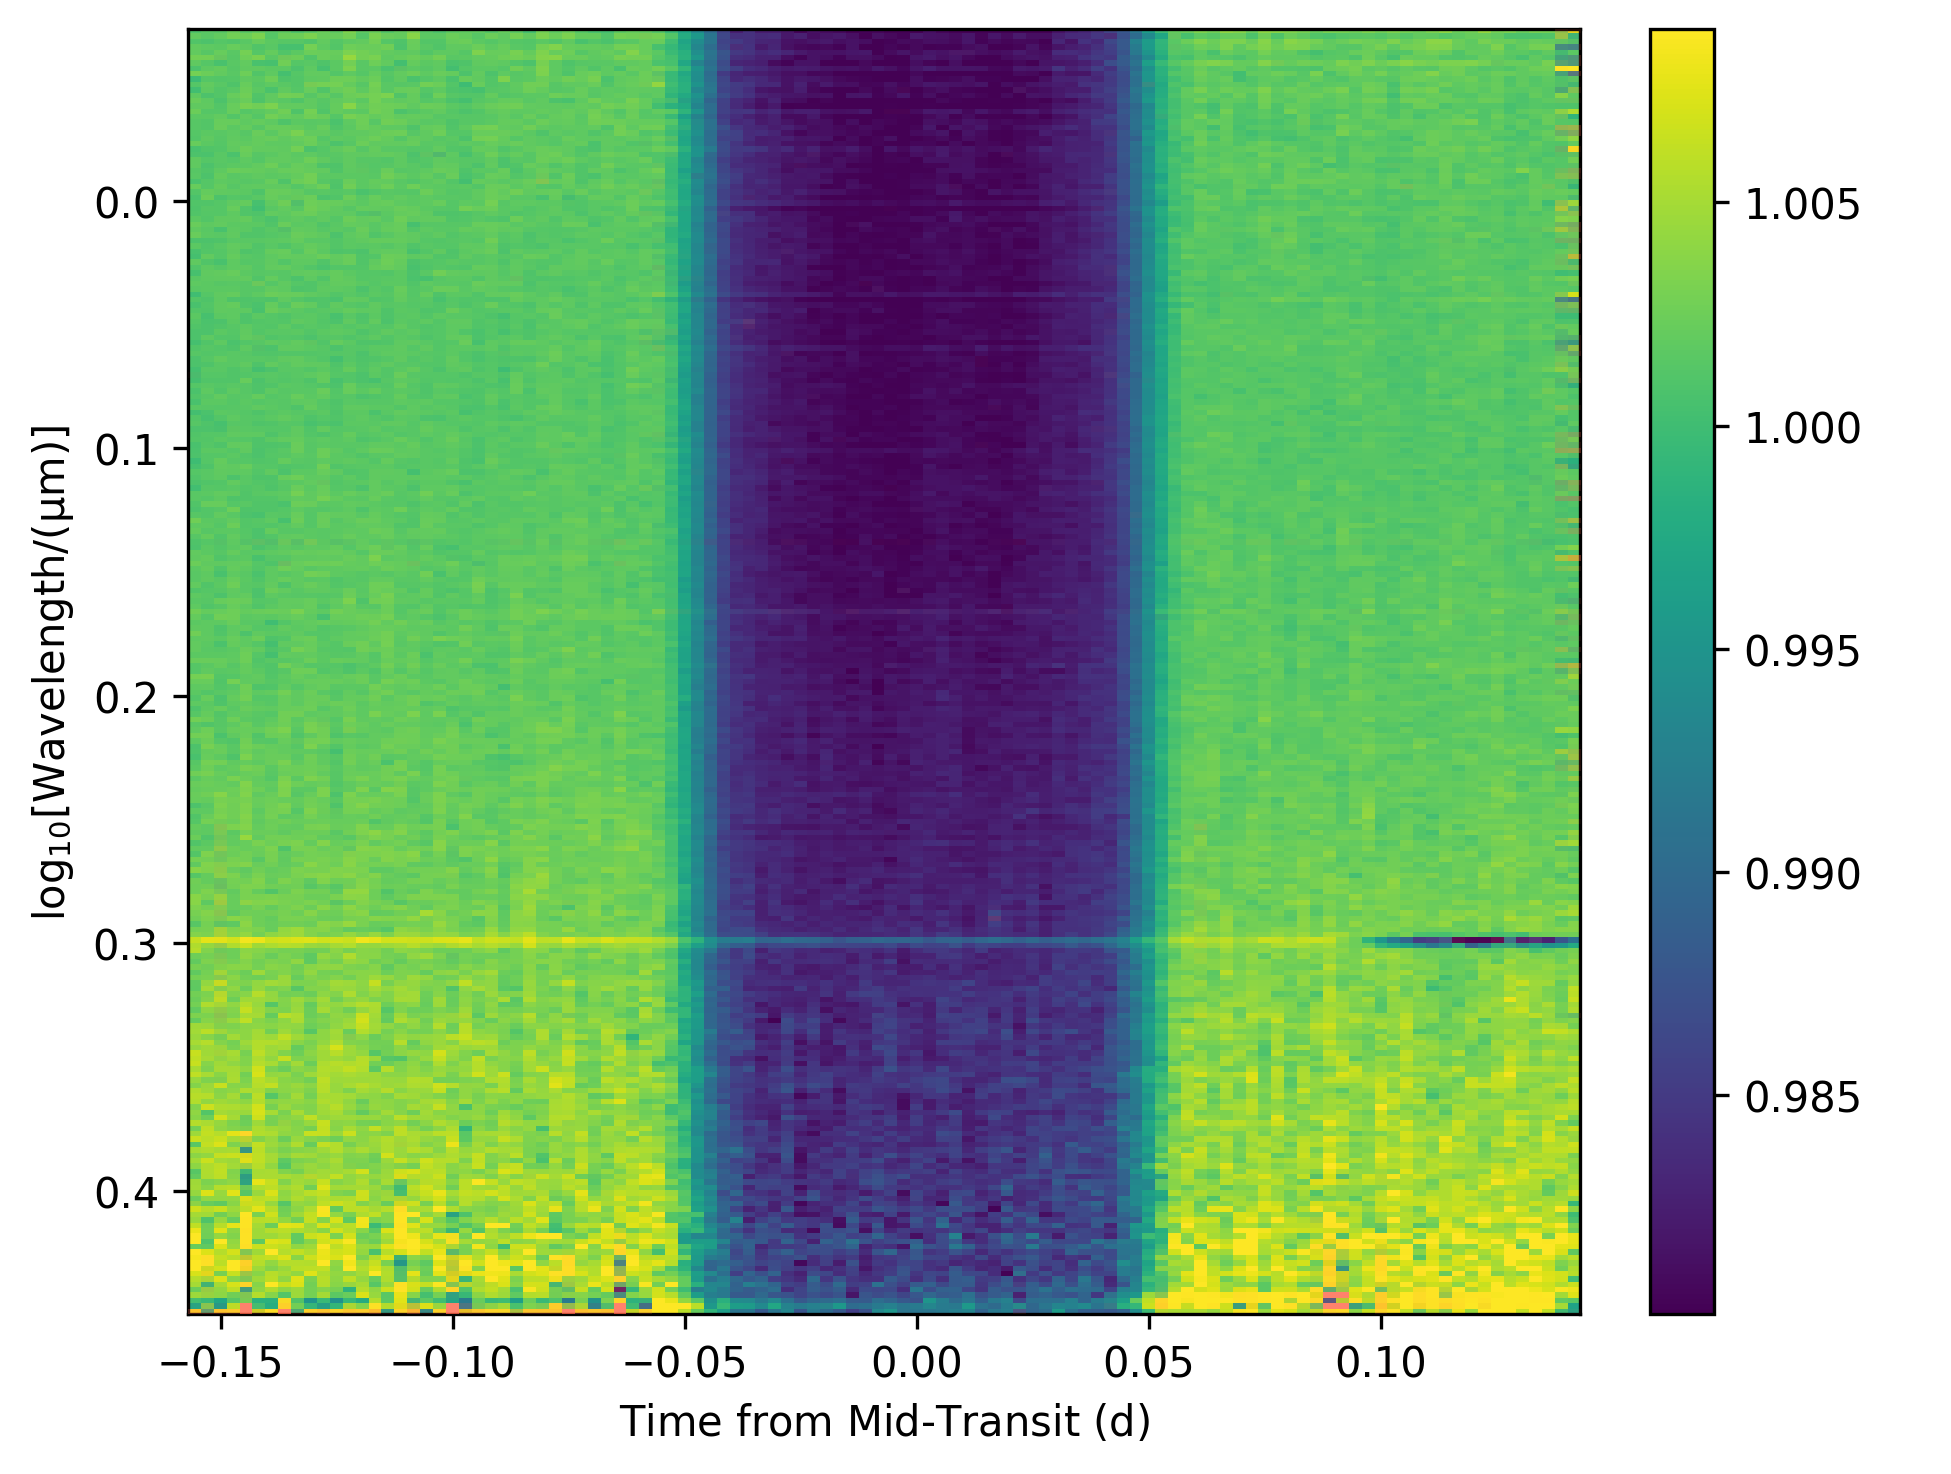

In [11]:
r_bin = rainbow.normalize().flag_outliers().bin(R=200, dt=4 * u.minute)
r_folded = r_bin.fold(period=5.5080232 * u.day, t0=2459033.31735 * u.day)
r_folded.imshow();

  0%|          | 0/469 [00:00<?, ?it/s]

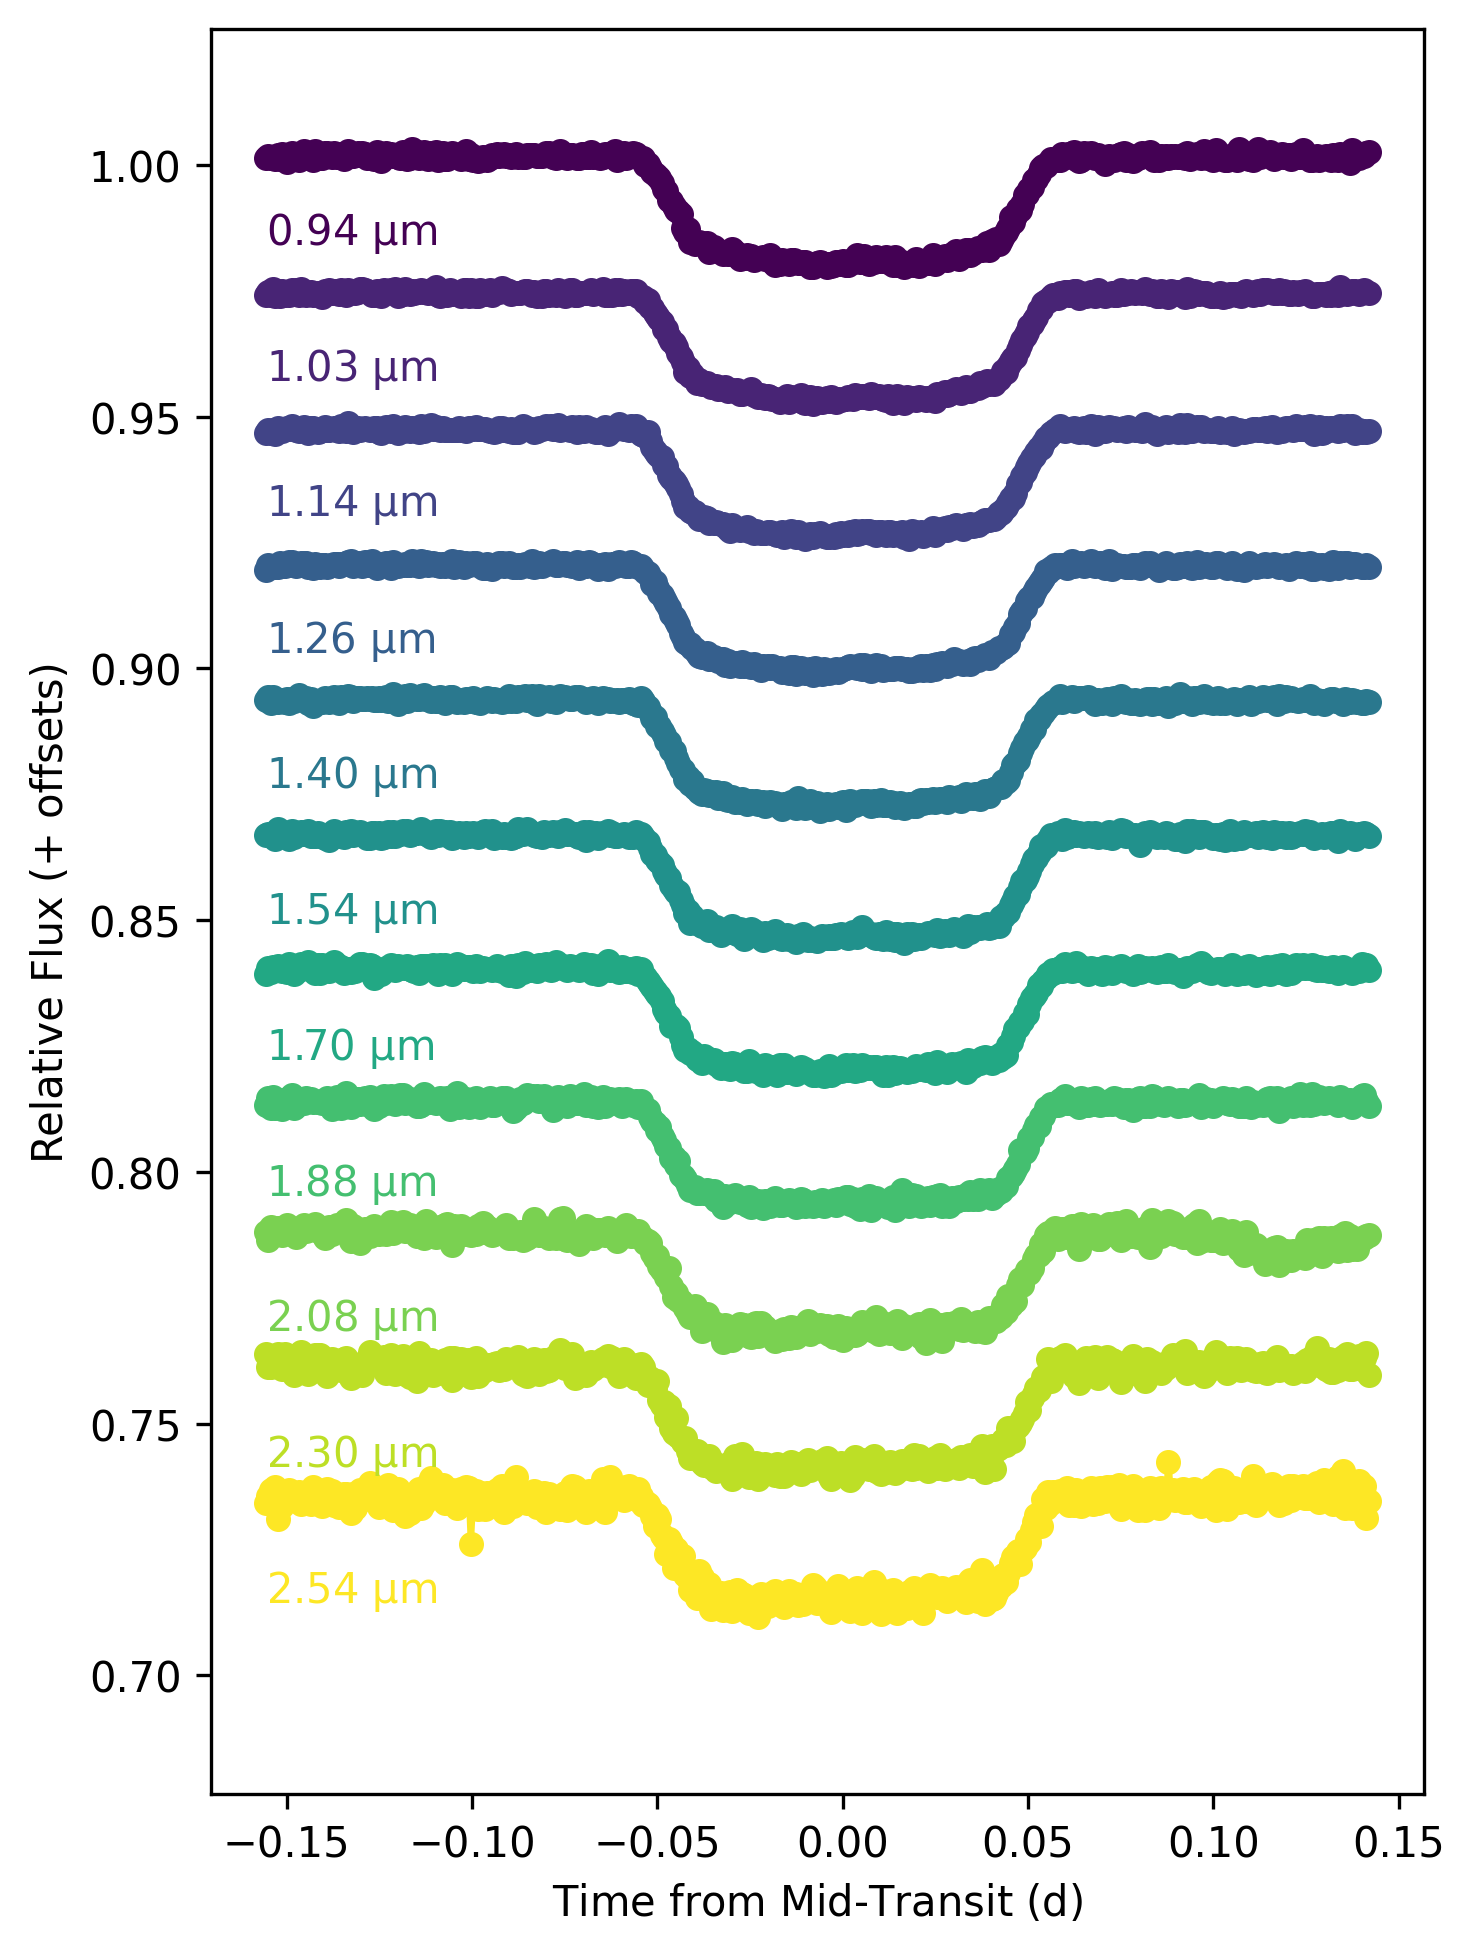

In [12]:
(
    rainbow.normalize()
    .flag_outliers()
    .bin(R=10)
    .fold(period=5.5080232 * u.day, t0=2459033.31735 * u.day)
    .plot()
);

In [13]:
r_hatp18 = rainbow.normalize().flag_outliers().bin(R=5).trim()

  0%|          | 0/469 [00:00<?, ?it/s]

# chromatic_fitting

In [14]:
from chromatic_fitting import *

Running chromatic_fitting v0.6.3!

This program is running on:
Python v3.9.15 (main, Nov  4 2022, 11:12:28) 
[Clang 12.0.0 ]
numpy v1.21.6
chromatic v0.4.5
pymc3 v3.11.4
pymc3_ext v0.1.1
exoplanet v0.5.3


In [15]:
from chromatic_fitting.version import __version__
__version__

'0.6.3'

## Create a Transit Model

In [16]:
# import any prior distributions we want to use for our parameters - I've chosen Normal and Uniform from pymc3
# and QuadLimbDark and ImpactParameter from exoplanet
from pymc3 import Normal, Uniform
from exoplanet import QuadLimbDark, ImpactParameter

Let's start with some transit parameters I've found on the exoplanet archive:

In [17]:
# planet params 
hatp18 = {'period':5.508029, 'r_s':0.717, 'sig_r_s':0.026, 'm_s':0.77, 'sig_m_s':0.031, 'r_p':0.0947, 'b':0.324, 't0':2459743.85}
# wasp39 = {'period':1.0, 'r_s':0.9, 'm_s':1, 'r_p':0.1, 'b':0.3}
# wasp96 = {'period':1.0, 'r_s':0.9, 'm_s':1, 'r_p':0.1, 'b':0.3}

And for this example I'm going to model HAT-P-18

In [18]:
planet = hatp18

We now can use `chromatic_fitting` to model a transit. The first step is to initialise and then setup our parameters. There are four types of parameters: 
- `Fixed` - A fixed value
- `WavelikeFixed` - A set of fixed values (one for each wavelength)
- `Fitted` - A single value to be fit across all wavelengths,
- `WavelikeFitted` - A set of values to be fit, one for each wavelength

In [36]:
# create transit model:
t = TransitModel()

# add our parameters:
t.setup_parameters(
                  period=planet['period'], # a fixed value!
                   epoch=Fitted(Uniform,lower=planet['t0']-0.05,upper=planet['t0']+0.05), # one fitted value across all wavelengths
                   stellar_radius = Fitted(Normal, mu=planet['r_s'], sigma=planet['sig_r_s']),
                   stellar_mass =Fitted(Normal, mu=planet['m_s'], sigma=planet['sig_m_s']),
                   radius_ratio=WavelikeFitted(Normal, mu=planet['r_p']/planet['r_s'], sigma=0.05), # a different value fitted for every wavelength!
                   impact_parameter=Fitted(ImpactParameter,ror=0.15,testval=planet['b']),
                   limb_darkening=WavelikeFitted(Uniform,testval=[0.2,0.3], shape=2),
                    baseline = WavelikeFitted(Normal, mu=1.0, sigma=0.02), 
                )

# print a summary of all params:
t.summarize_parameters()

transit_stellar_radius =
  <🧮 Fitted Normal(mu=0.717, sigma=0.026, name='transit_stellar_radius') 🧮>

transit_stellar_mass =
  <🧮 Fitted Normal(mu=0.77, sigma=0.031, name='transit_stellar_mass') 🧮>

transit_radius_ratio =
  <🧮 WavelikeFitted Normal(mu=0.13207810320781033, sigma=0.05, name='transit_radius_ratio') for each wavelength 🧮>

transit_period =
  <🧮 Fixed | 5.508029 🧮>

transit_epoch =
  <🧮 Fitted Uniform(lower=2459743.8000000003, upper=2459743.9, name='transit_epoch') 🧮>

transit_baseline =
  <🧮 WavelikeFitted Normal(mu=1.0, sigma=0.02, name='transit_baseline') for each wavelength 🧮>

transit_impact_parameter =
  <🧮 Fitted ImpactParameter(ror=0.15, testval=0.324, name='transit_impact_parameter') 🧮>

transit_eccentricity =
  <🧮 Fixed | 0.0 🧮>

transit_omega =
  <🧮 Fixed | 0 🧮>

transit_limb_darkening =
  <🧮 WavelikeFitted Uniform(testval=[0.2, 0.3], shape=2, name='transit_limb_darkening') for each wavelength 🧮>



In [37]:
# attach the Rainbow object to the model:
t.attach_data(r_hatp18)

# this is the last point where we can change the optimization method:
t.choose_optimization_method("separate")
# t.choose_optimization_method("white_light")

# setup the lightcurves for the transit model:
t.setup_lightcurves()
# t.white_light = t.white_light.trim()

# relate the "actual" data to the model (using a Normal likelihood function)
t.setup_likelihood()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [42]:
print(t._pymc3_model)

[<pymc3.model.Model object at 0x296605220>, <pymc3.model.Model object at 0x2c779b8e0>, <pymc3.model.Model object at 0x2caaf1130>, <pymc3.model.Model object at 0x2caaf1c40>, <pymc3.model.Model object at 0x297cd7100>]


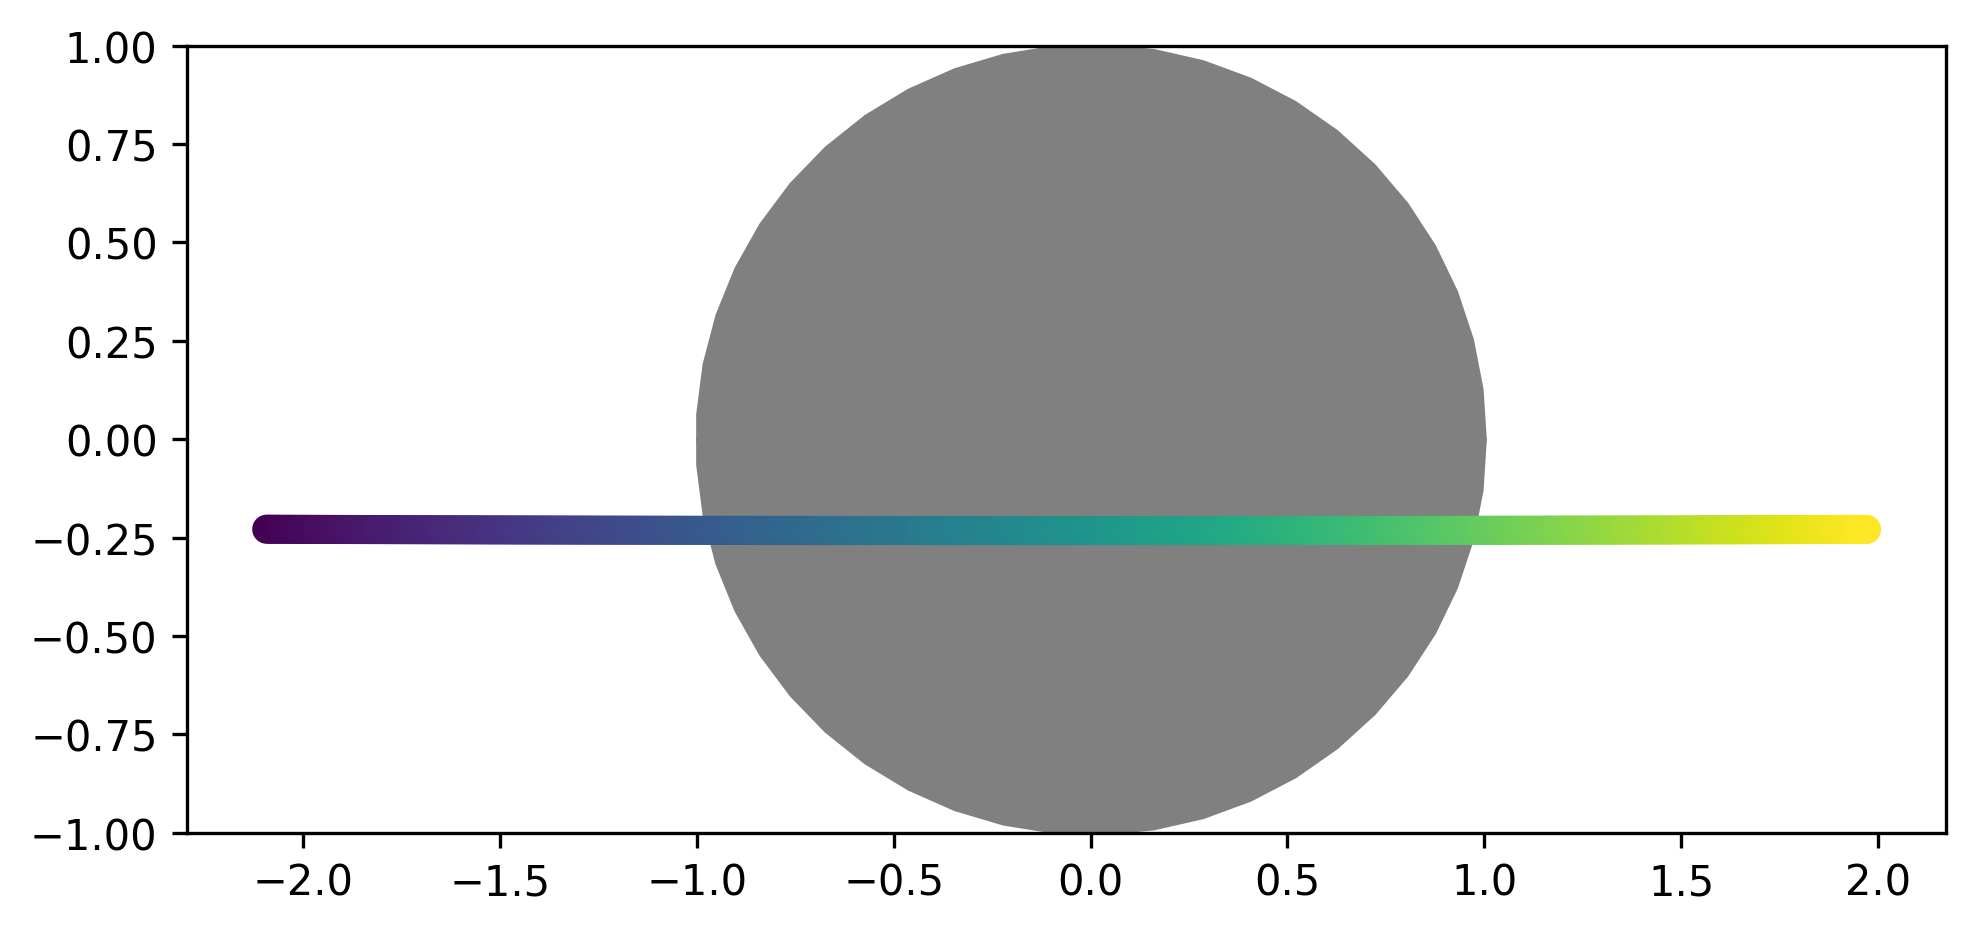

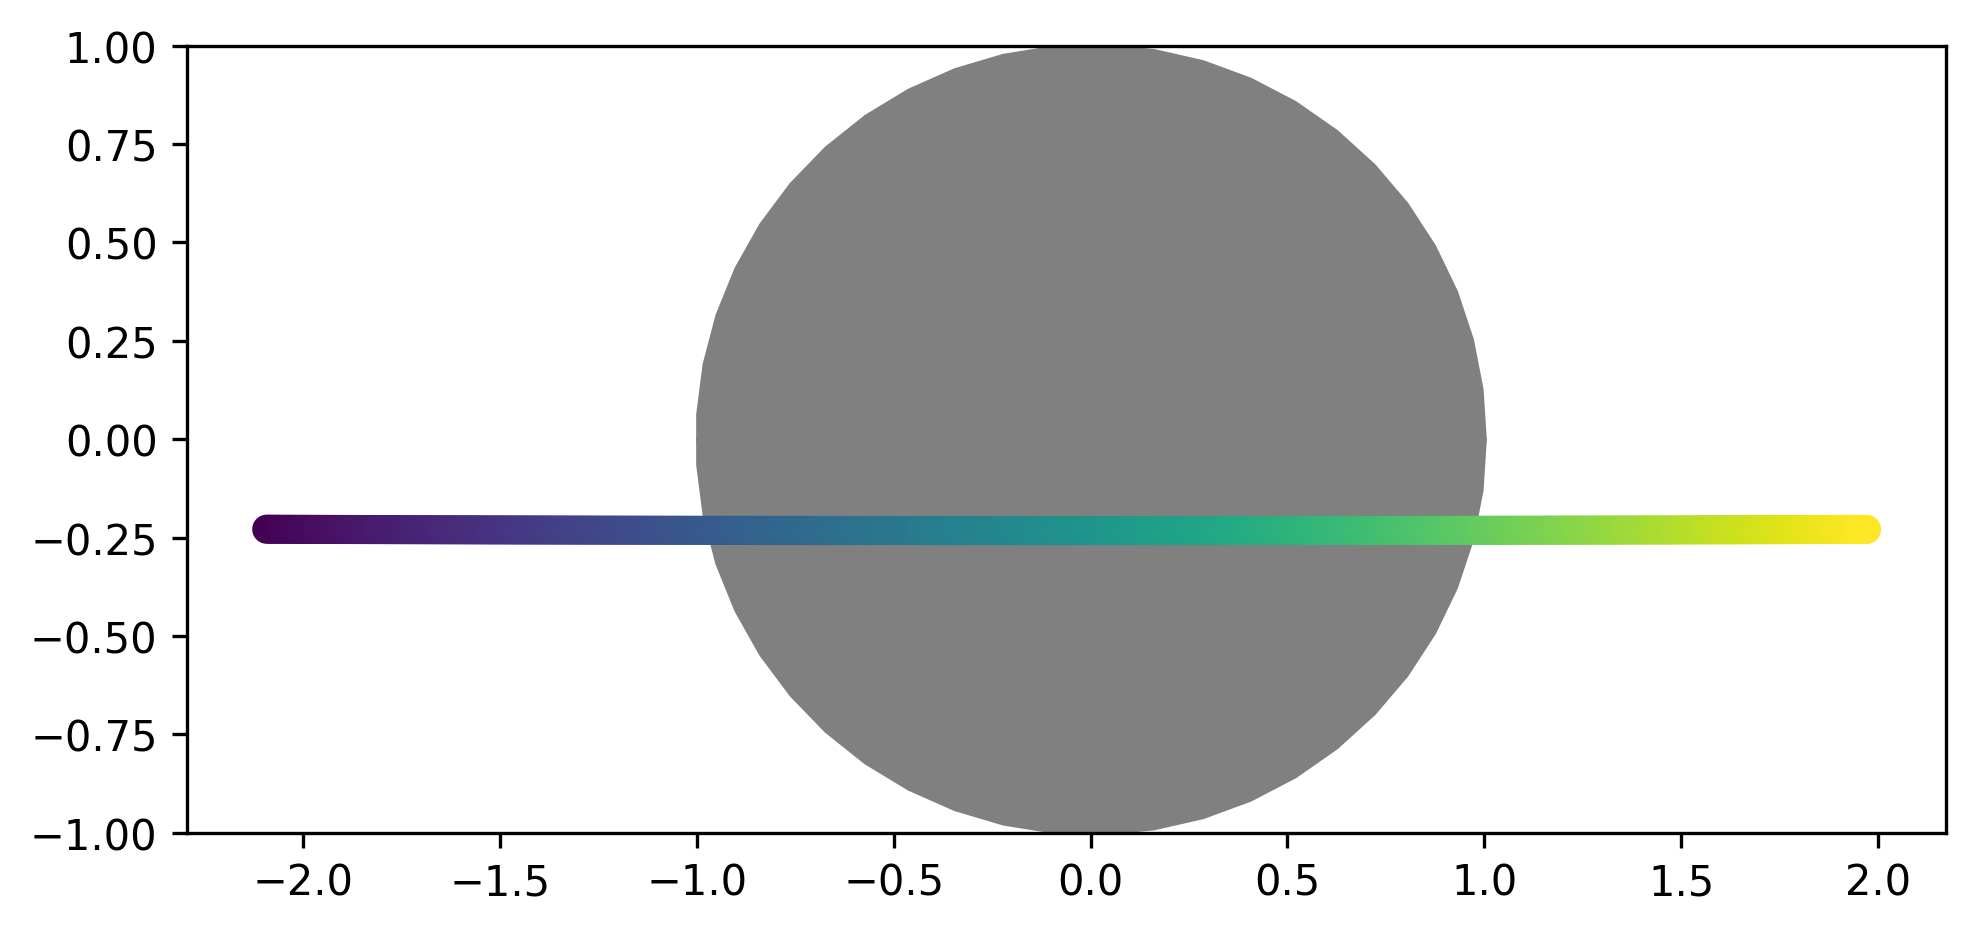

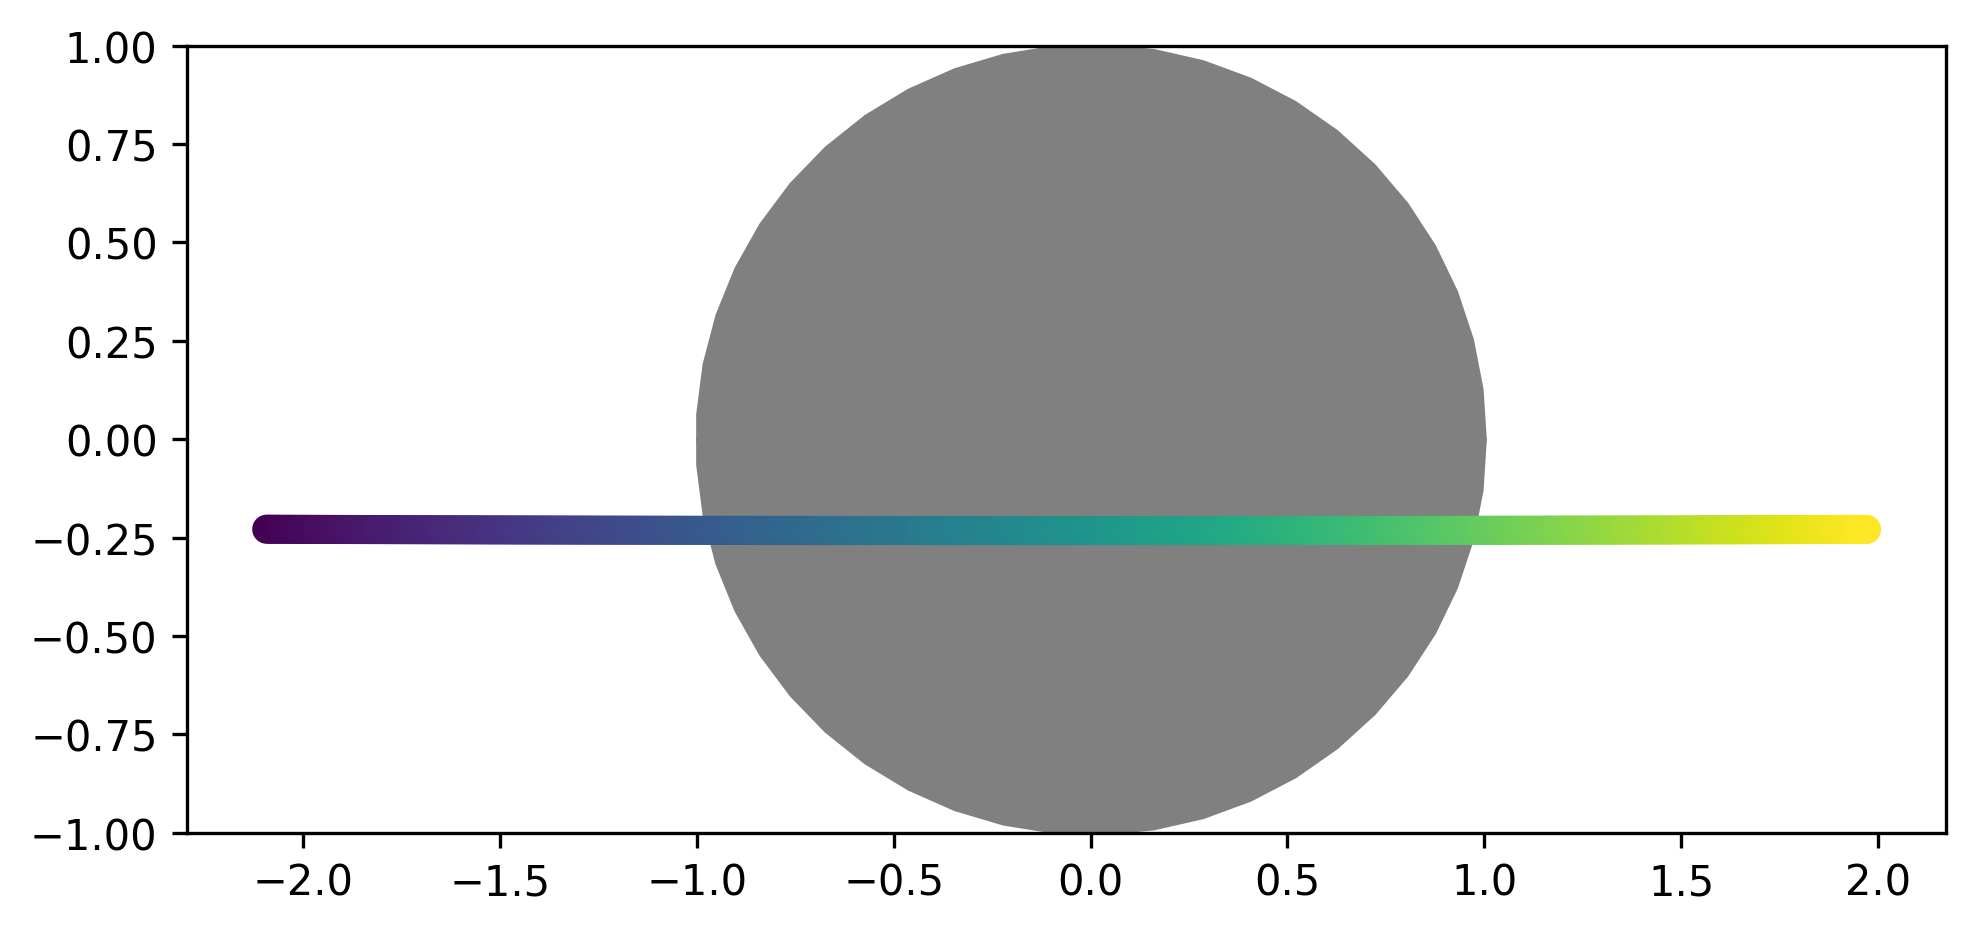

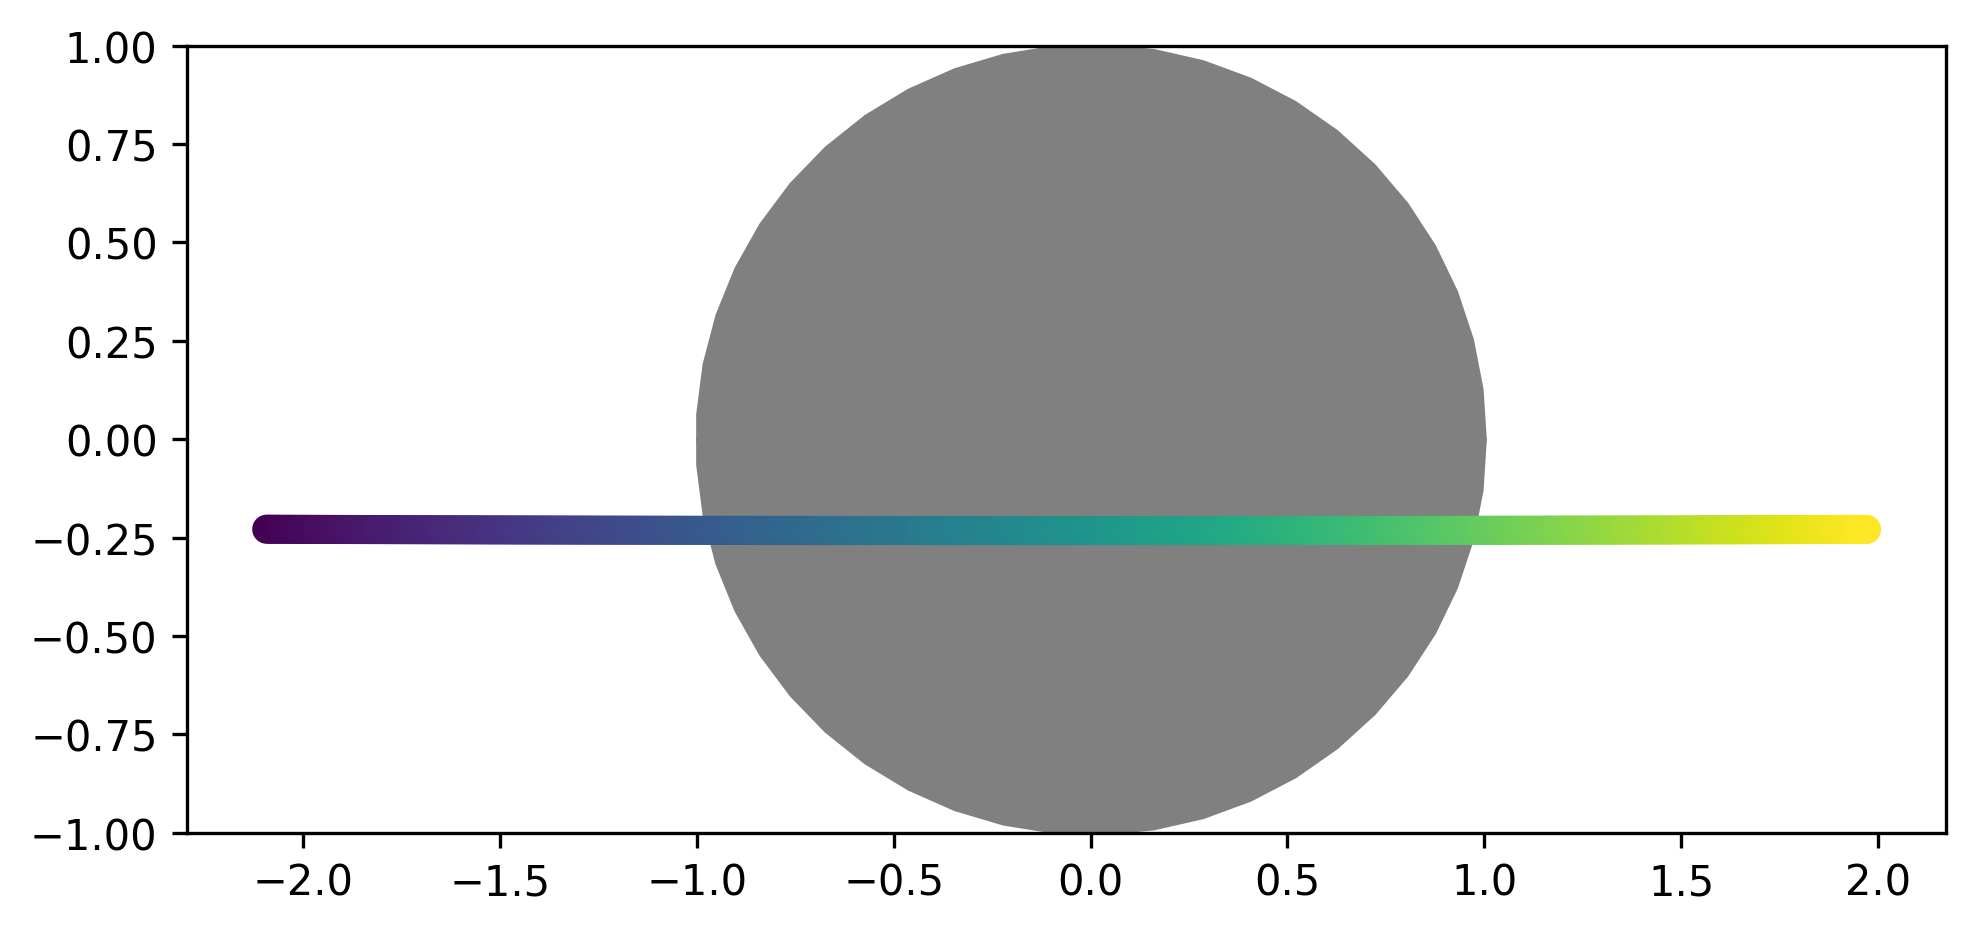

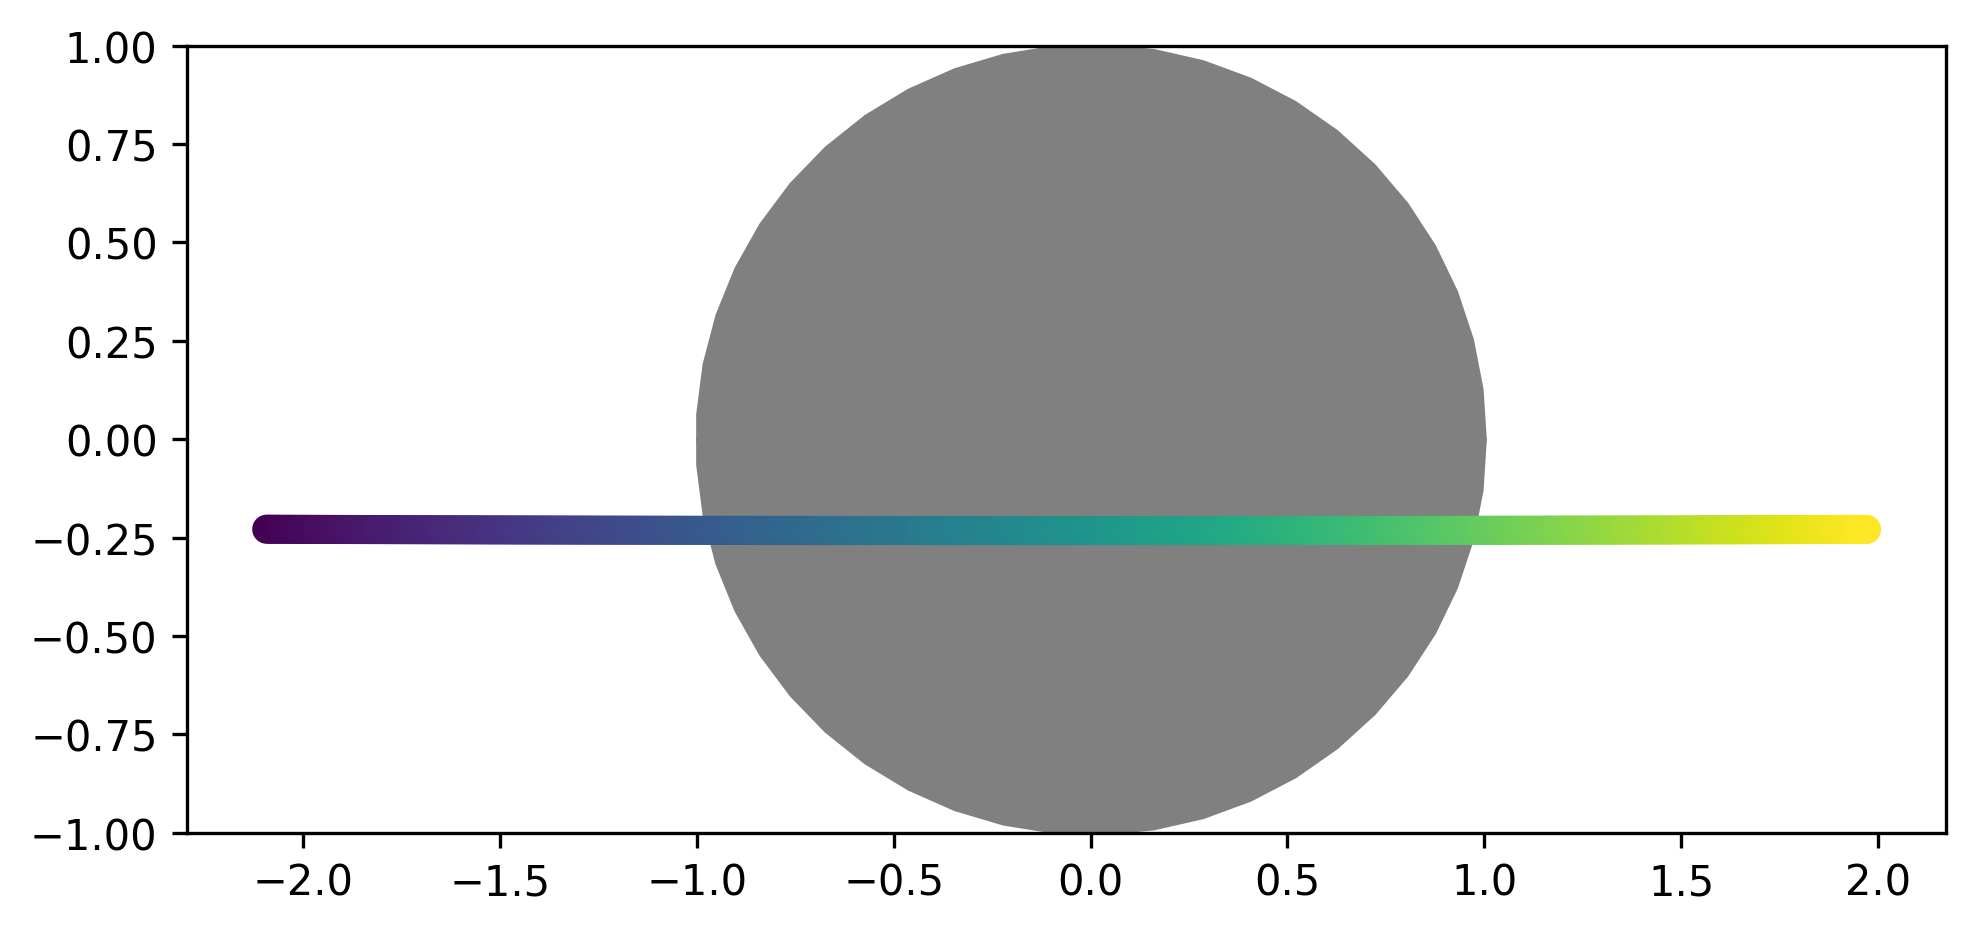

In [39]:
t.plot_orbit()

The summarize step has not been run yet. To include the 'best-fit' model please run {self}.sample() and {self}.summarize() before calling this step!


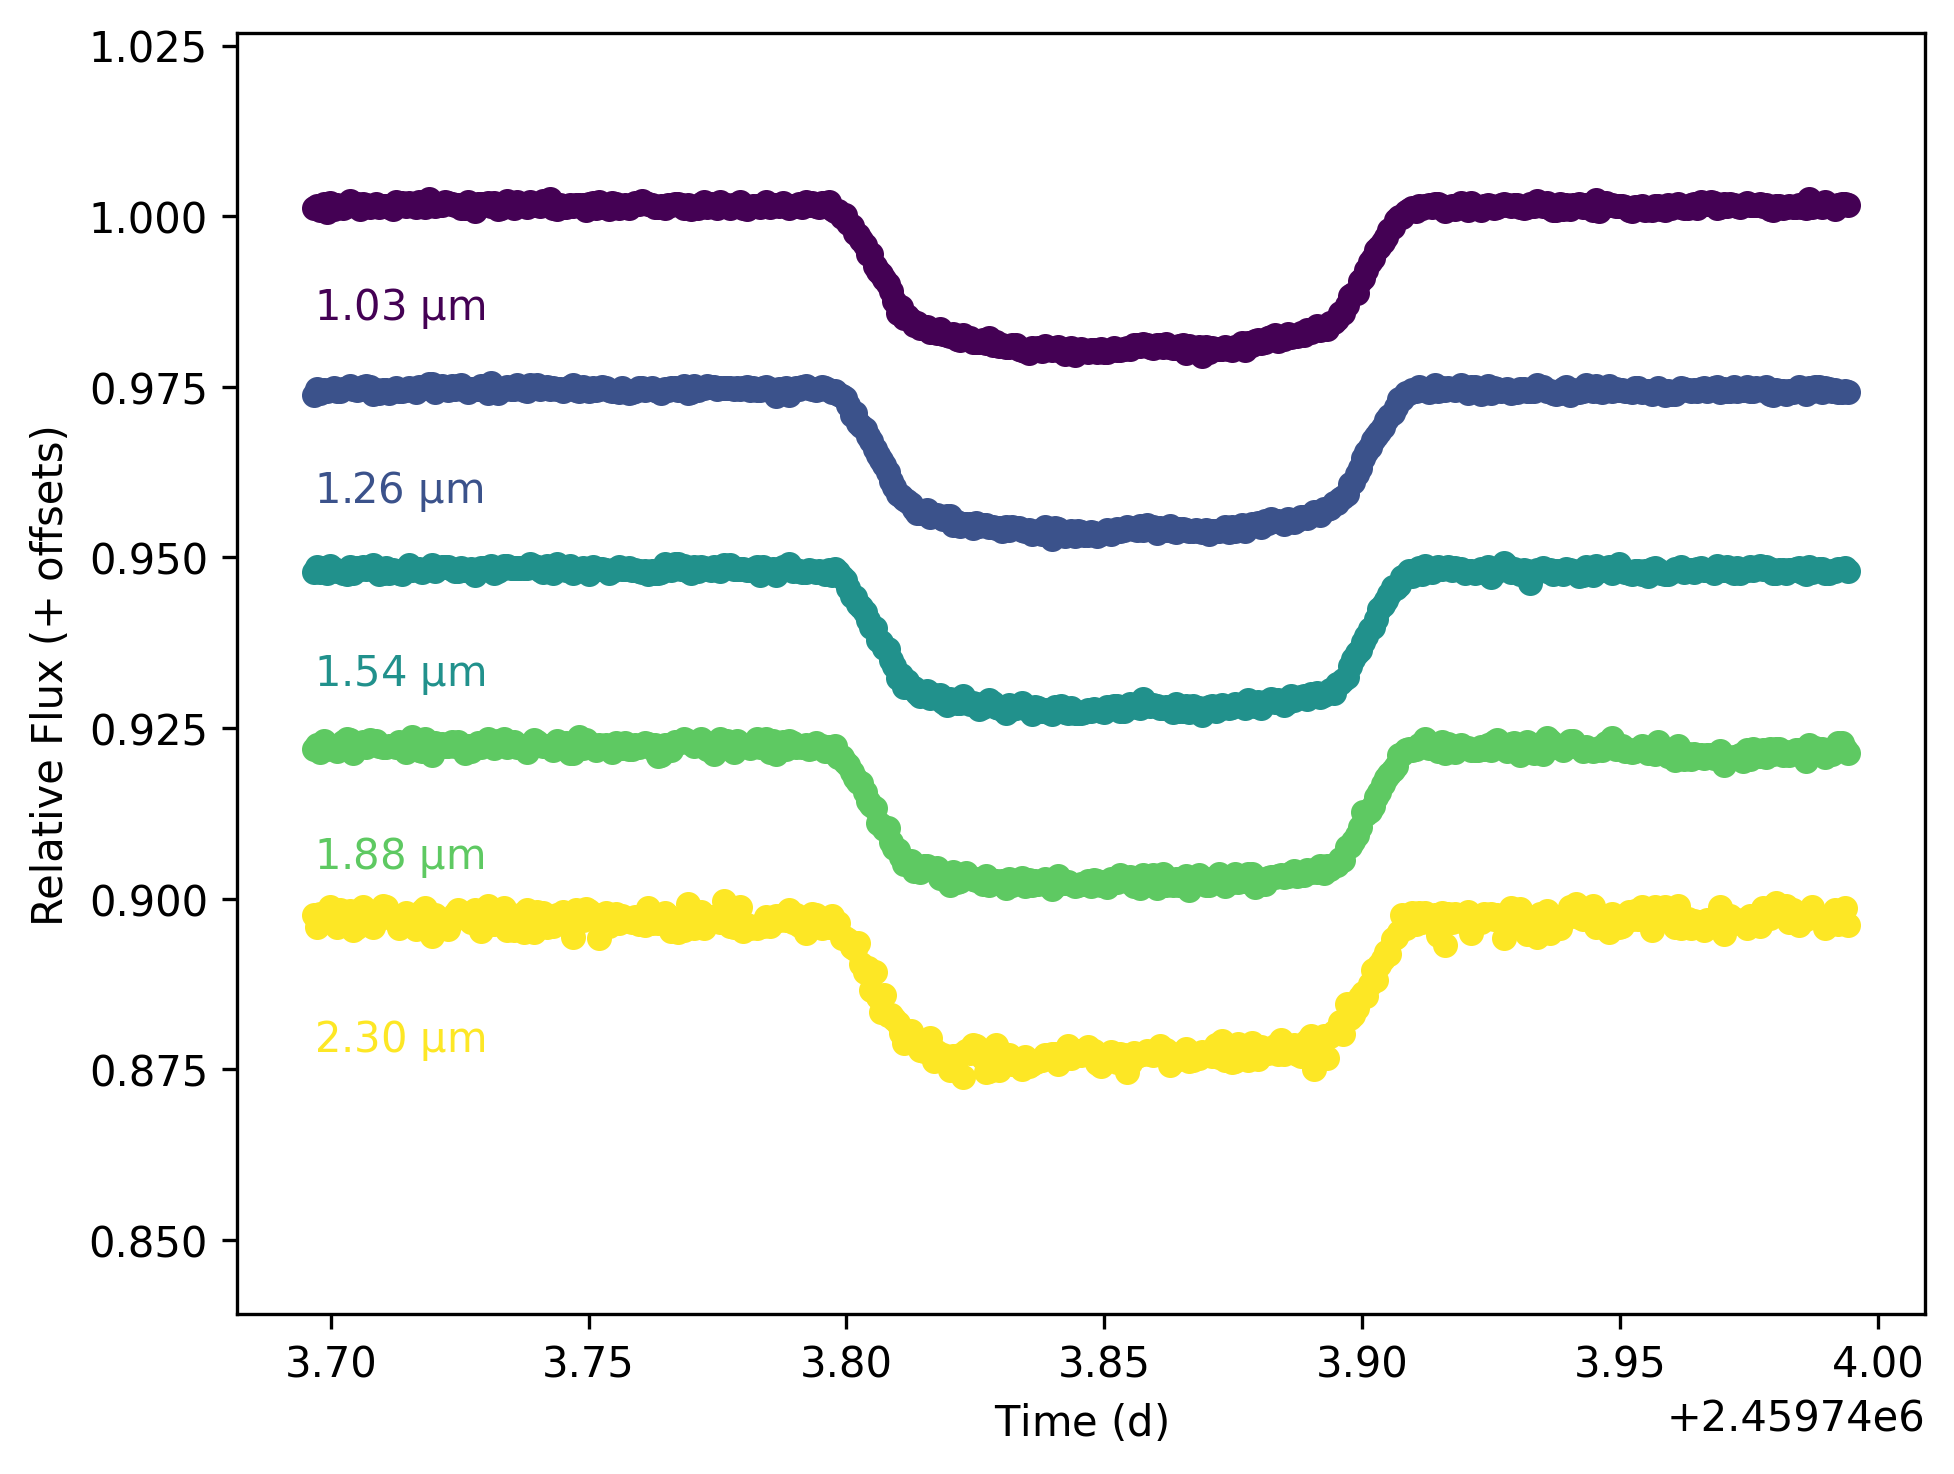

In [43]:
t.plot_lightcurves()

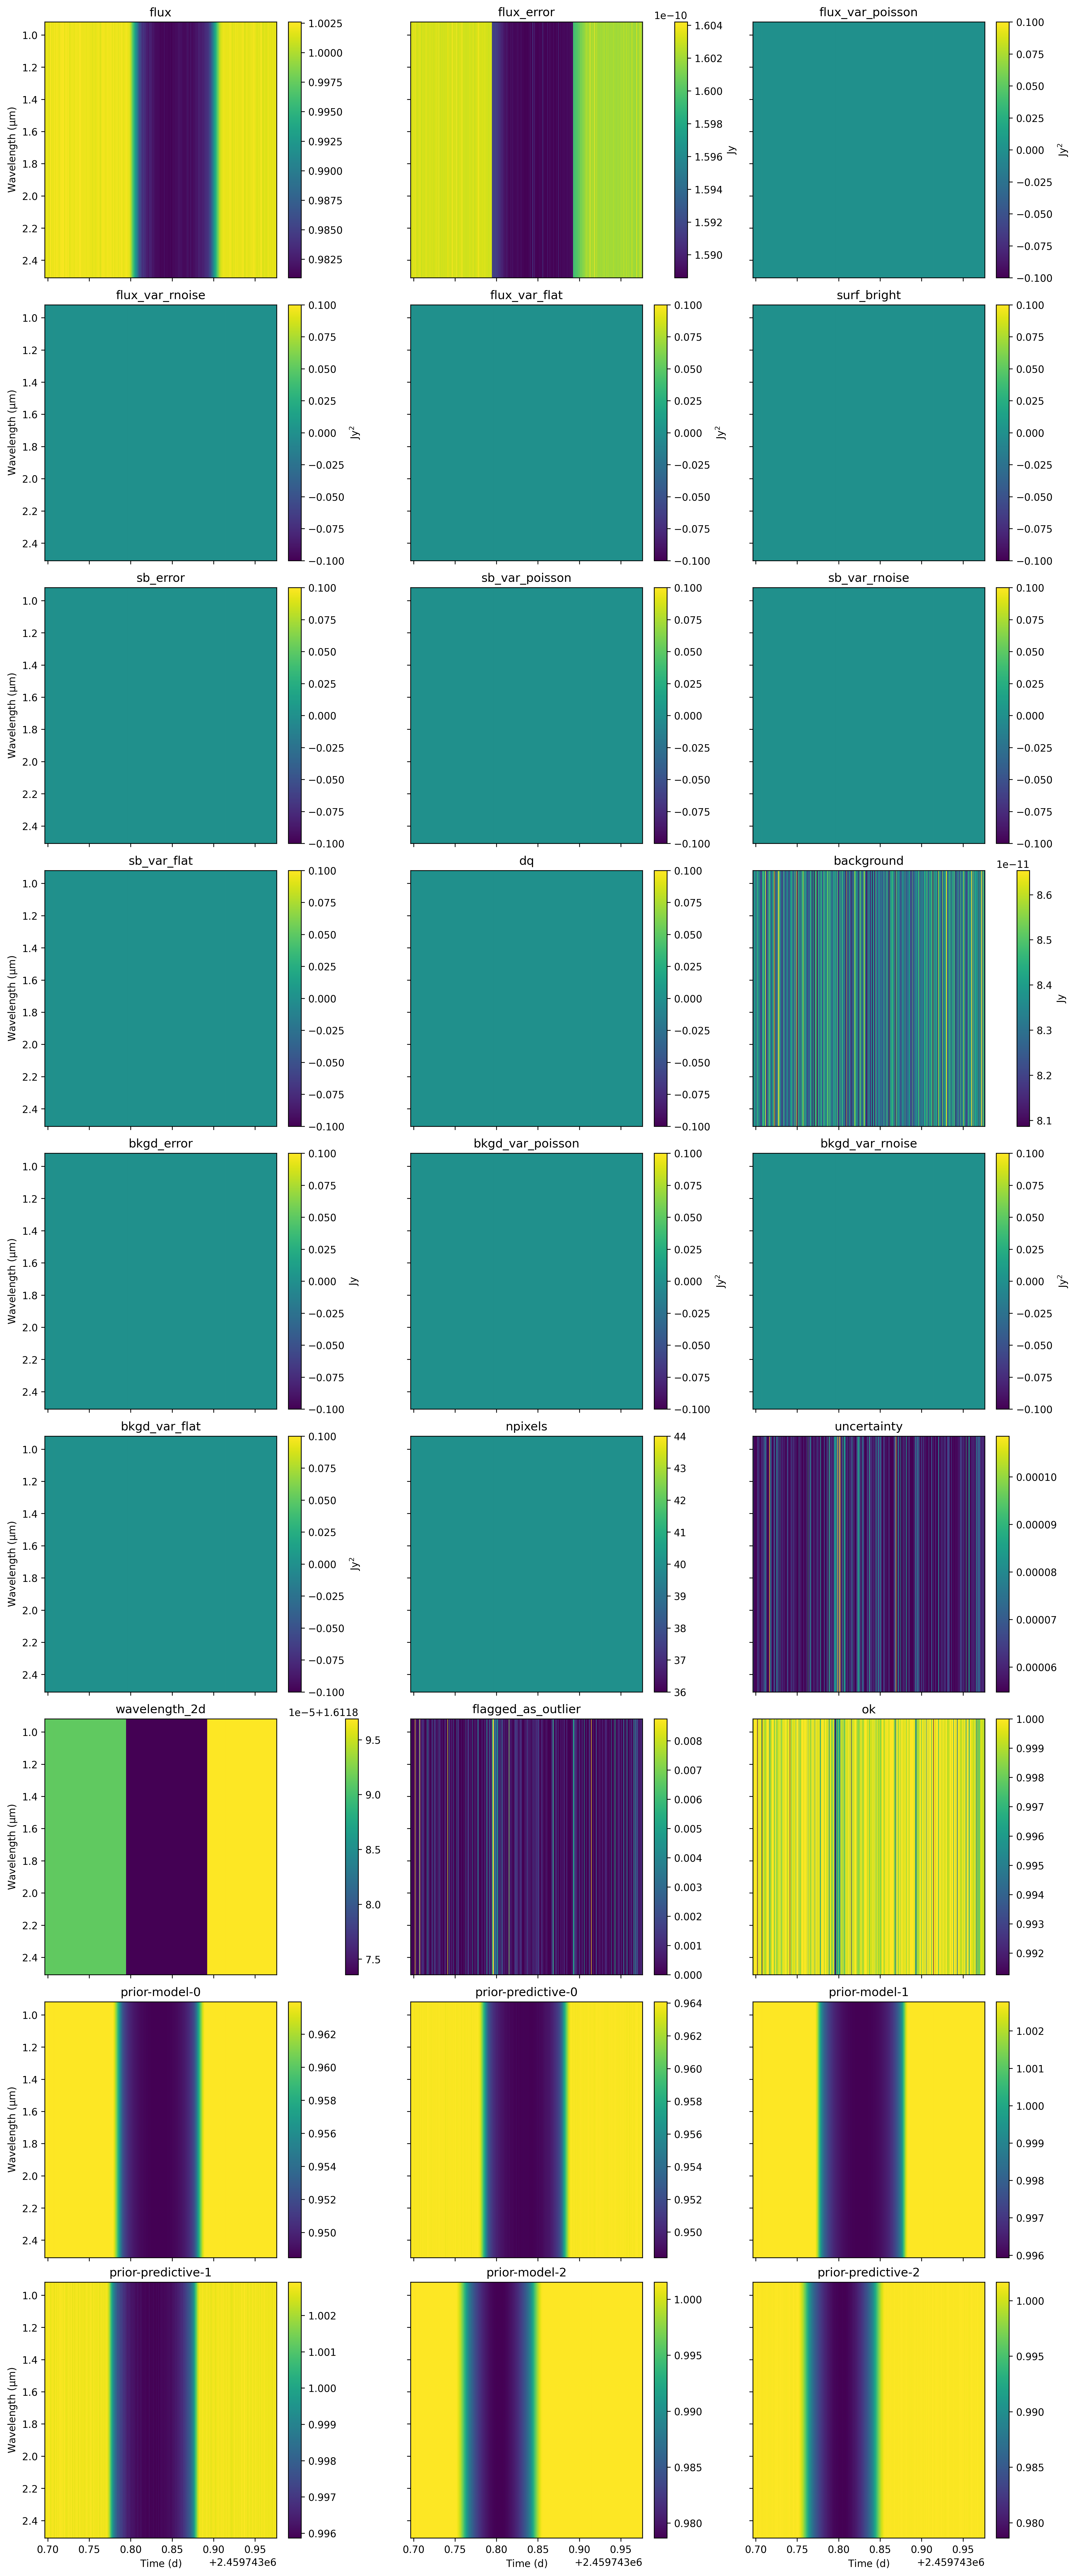

In [24]:
t.plot_priors()

In [44]:
# optimize for initial values!
opt = t.optimize(plot=False)

# put those initial values into the sampling and define the number of tuning and draw steps, 
# as well as the number of chains. NOTE: if you do separate wavelength fitting then the number of steps 
# is per wavelengths, not divided between the wavelengths!
t.sample(start=opt, tune=2000, draws=3000, chains=4, cores=4) 

optimizing logp for variables: [transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]


message: Desired error not necessarily achieved due to precision loss.
logp: -62131.58136939983 -> 1472.7861396924081


optimizing logp for variables: [transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]


message: Desired error not necessarily achieved due to precision loss.
logp: -70748.31199766455 -> 1175.4948285118367
optimizing logp for variables: [transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]


message: Desired error not necessarily achieved due to precision loss.
logp: -72754.19799181315 -> 842.9720918876366


optimizing logp for variables: [transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]


message: Desired error not necessarily achieved due to precision loss.
logp: -78382.95887968087 -> -1008.1996715669826


optimizing logp for variables: [transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]


message: Desired error not necessarily achieved due to precision loss.
logp: -88332.82776605723 -> -2367.847572534864




Sampling for Wavelength: 0


/Users/camu5866/opt/anaconda3/envs/spec_meeting/lib/python3.9/site-packages/pymc3_ext/sampling/sampling.py:109: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return pm.sample(draws=draws, tune=tune, model=model, step=step, **kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]


Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 12 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.



Sampling for Wavelength: 1


/Users/camu5866/opt/anaconda3/envs/spec_meeting/lib/python3.9/site-packages/pymc3_ext/sampling/sampling.py:109: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return pm.sample(draws=draws, tune=tune, model=model, step=step, **kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]


Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 13 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.



Sampling for Wavelength: 2


/Users/camu5866/opt/anaconda3/envs/spec_meeting/lib/python3.9/site-packages/pymc3_ext/sampling/sampling.py:109: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return pm.sample(draws=draws, tune=tune, model=model, step=step, **kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]


Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 16 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.



Sampling for Wavelength: 3


/Users/camu5866/opt/anaconda3/envs/spec_meeting/lib/python3.9/site-packages/pymc3_ext/sampling/sampling.py:109: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return pm.sample(draws=draws, tune=tune, model=model, step=step, **kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]


Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 16 seconds.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There were 68 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8376404873187914, but should be close to 0.9. Try to increase the number of tuning steps.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 77 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.



Sampling for Wavelength: 4


/Users/camu5866/opt/anaconda3/envs/spec_meeting/lib/python3.9/site-packages/pymc3_ext/sampling/sampling.py:109: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return pm.sample(draws=draws, tune=tune, model=model, step=step, **kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]


Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 15 seconds.
There were 28 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 29 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [45]:
t.summarize(round_to=7, hdi_prob=0.68, fmt='wide')

[                                      mean        sd       hdi_16%  \
transit_stellar_radius[0]     7.255669e-01  0.009147  7.164176e-01   
transit_stellar_mass[0]       7.669923e-01  0.028612  7.405063e-01   
transit_radius_ratio[0]       1.362782e-01  0.000230  1.360582e-01   
transit_baseline[0]           1.001533e+00  0.000006  1.001526e+00   
transit_epoch[0]              2.459744e+06  0.000014  2.459744e+06   
transit_impact_parameter[0]   3.685903e-01  0.008386  3.607509e-01   
transit_a_R*[0]               1.655605e+01  0.045416  1.650985e+01   
transit_limb_darkening[0, 0]  1.733474e-01  0.015796  1.574237e-01   
transit_limb_darkening[0, 1]  4.540820e-01  0.034921  4.180615e-01   

                                   hdi_84%     mcse_mean       mcse_sd  \
transit_stellar_radius[0]     7.343641e-01  1.207000e-04  8.530000e-05   
transit_stellar_mass[0]       7.970905e-01  3.825000e-04  2.705000e-04   
transit_radius_ratio[0]       1.365138e-01  2.300000e-06  1.700000e-06   
tr

In [46]:
results = t.get_results(uncertainty='sd')

In [47]:
results

transit_baseline transit_baseline_sd transit_eccentricity  \
w0         1.001533            0.000006                  0.0   
w1         1.001421            0.000006                  0.0   
w2         1.001796            0.000007                  0.0   
w3          1.00257            0.000008                  0.0   
w4         1.004247            0.000013                  0.0   

   transit_eccentricity_sd   transit_epoch transit_epoch_sd  \
w0                     0.0  2459743.853466         0.000014   
w1                     0.0  2459743.853424         0.000012   
w2                     0.0  2459743.853406         0.000014   
w3                     0.0  2459743.853322         0.000018   
w4                     0.0  2459743.853193         0.000026   

   transit_impact_parameter transit_impact_parameter_sd  \
w0                  0.36859                    0.008386   
w1                 0.317176                     0.00913   
w2                 0.362127                    0.008076   
w3                 0.334362                    0.010387   
w4                 0.483968                    0.010423   

    transit_limb_darkening transit_limb_darkening_sd  ... transit_omega_sd  \
w0   [0.1733474, 0.454082]    [0.0157959, 0.0349212]  ...                0   
w1  [0.0876116, 0.5742942]    [0.0123965, 0.0287204]  ...                0   
w2  [0.0785077, 0.4067587]    [0.0164419, 0.0344231]  ...                0   
w3   [0.006502, 0.4881183]    [0.0055373, 0.0173028]  ...                0   
w4  [0.0086111, 0.2357529]    [0.0080263, 0.0264217]  ...                0   

   transit_period transit_period_sd transit_radius_ratio  \
w0       5.508029          5.508029             0.136278   
w1       5.508029          5.508029              0.13539   
w2       5.508029          5.508029             0.136492   
w3       5.508029          5.508029             0.134697   
w4       5.508029          5.508029              0.13934   

   transit_radius_ratio_sd transit_stellar_mass transit_stellar_mass_sd  \
w0                 0.00023             0.766992                0.028612   
w1                0.000198              0.77141                0.029236   
w2                0.000184             0.768864                0.028567   
w3                 0.00017             0.771263                0.029434   
w4                0.000225             0.752647                0.029233   

   transit_stellar_radius transit_stellar_radius_sd                 wavelength  
w0               0.725567                  0.009147  1.0335468131073784 micron  
w1               0.715106                   0.00912  1.2623769282170056 micron  
w2               0.720495                  0.009016  1.5418706619620135 micron  
w3               0.717518                  0.009363    1.88324507924665 micron  
w4               0.754132                   0.01028   2.300200734083426 micron  

[5 rows x 21 columns]

In [48]:
models = t.get_model()
models.keys()

dict_keys(['w0', 'w1', 'w2', 'w3', 'w4'])

## Plot results

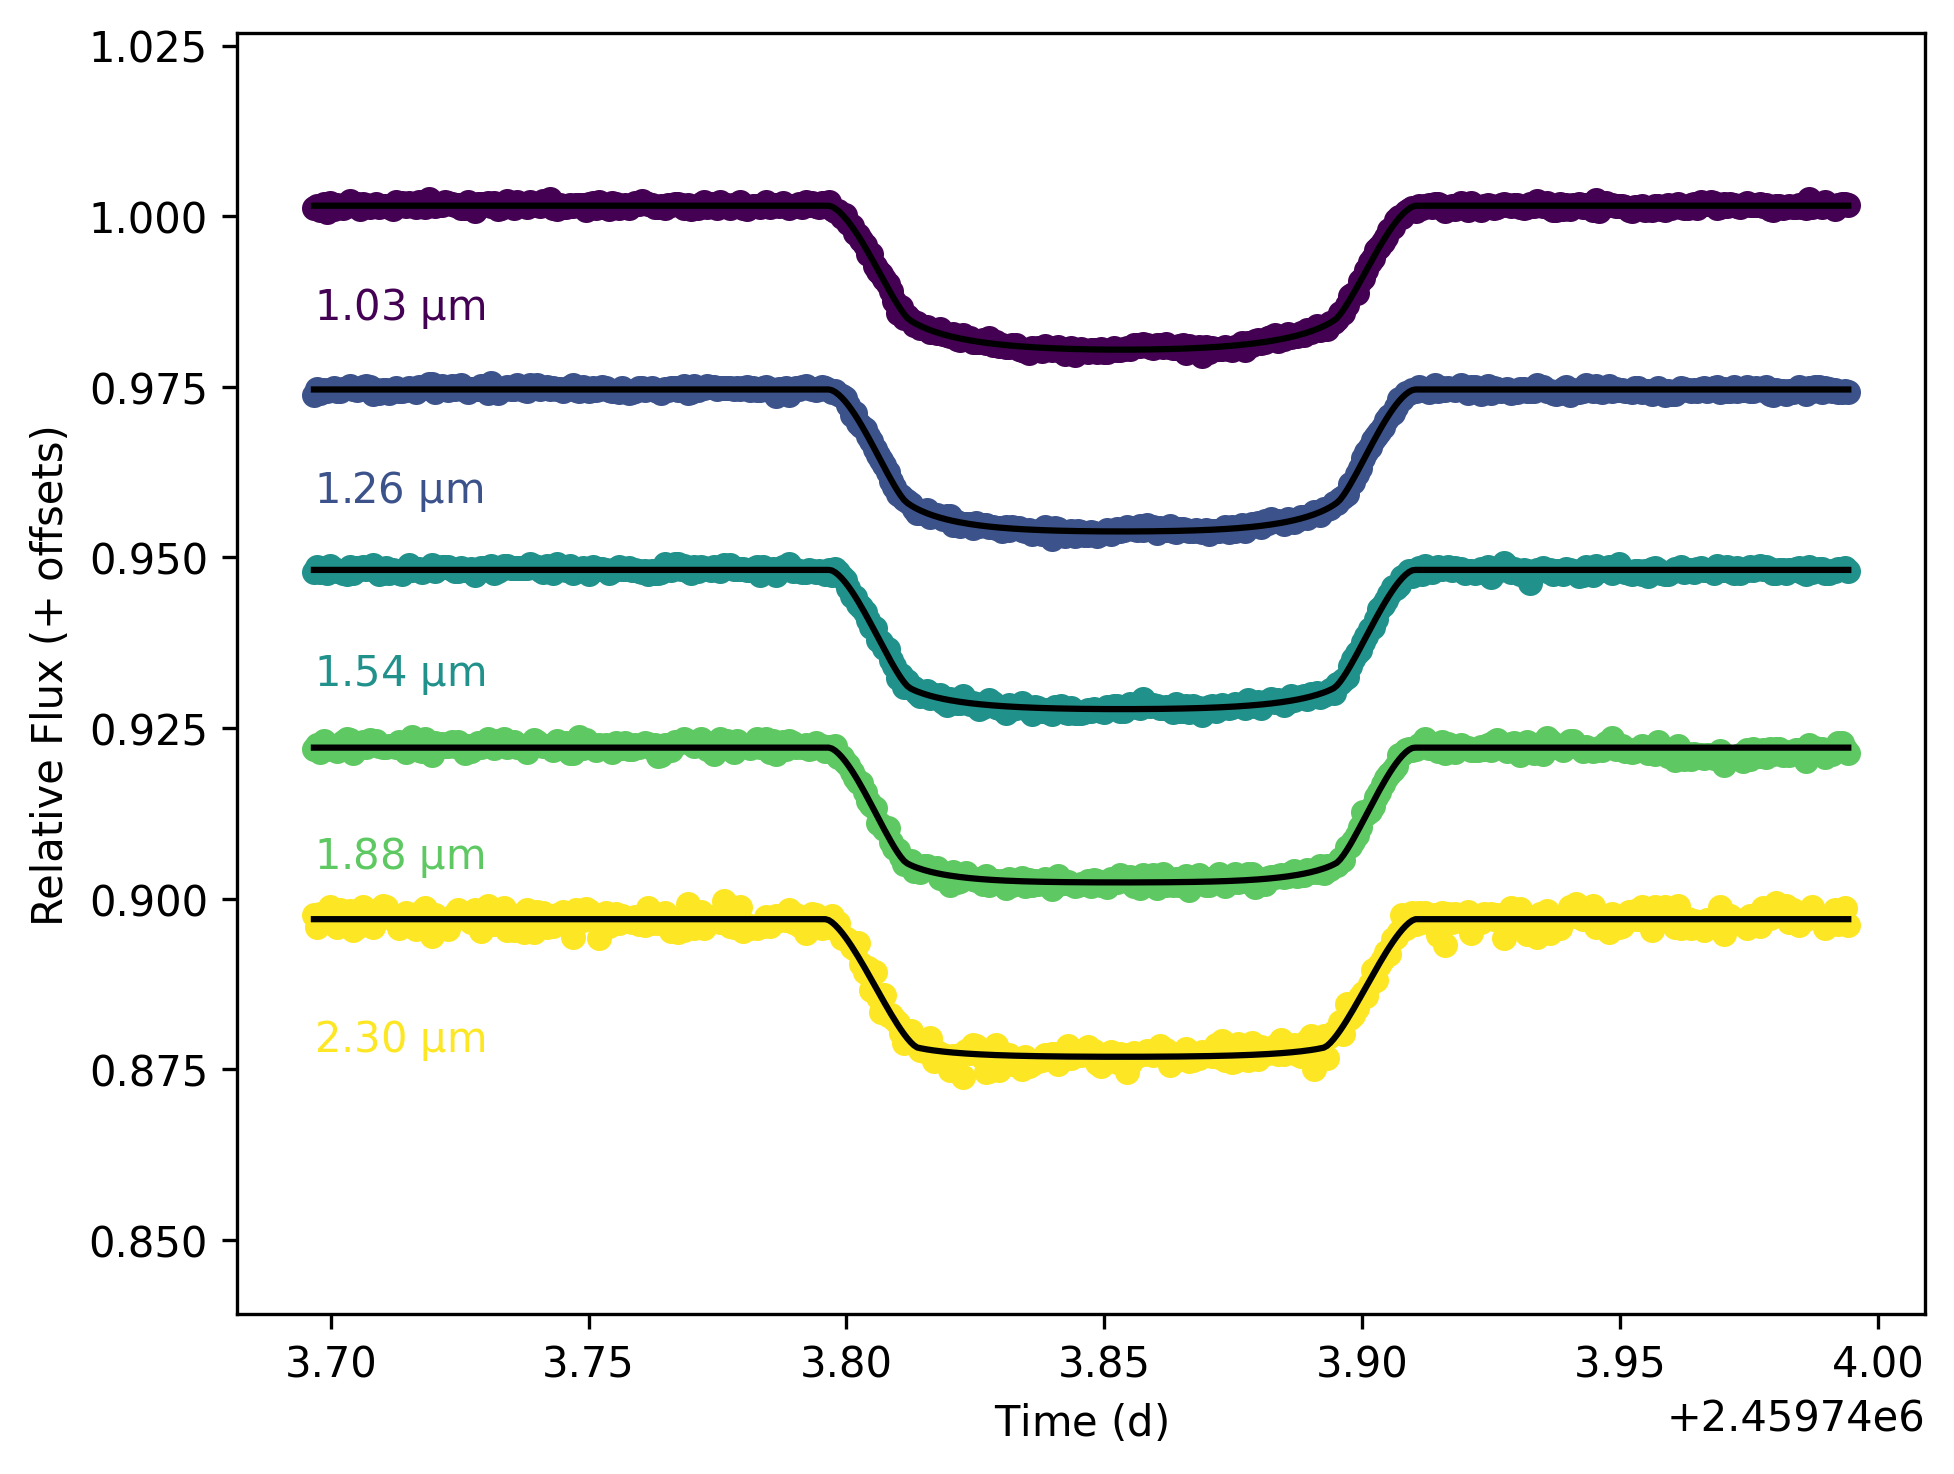

In [49]:
t.plot_lightcurves()

No model attached to data. Running `add_model_to_rainbow` now. You can access this data later using [self].data_with_model


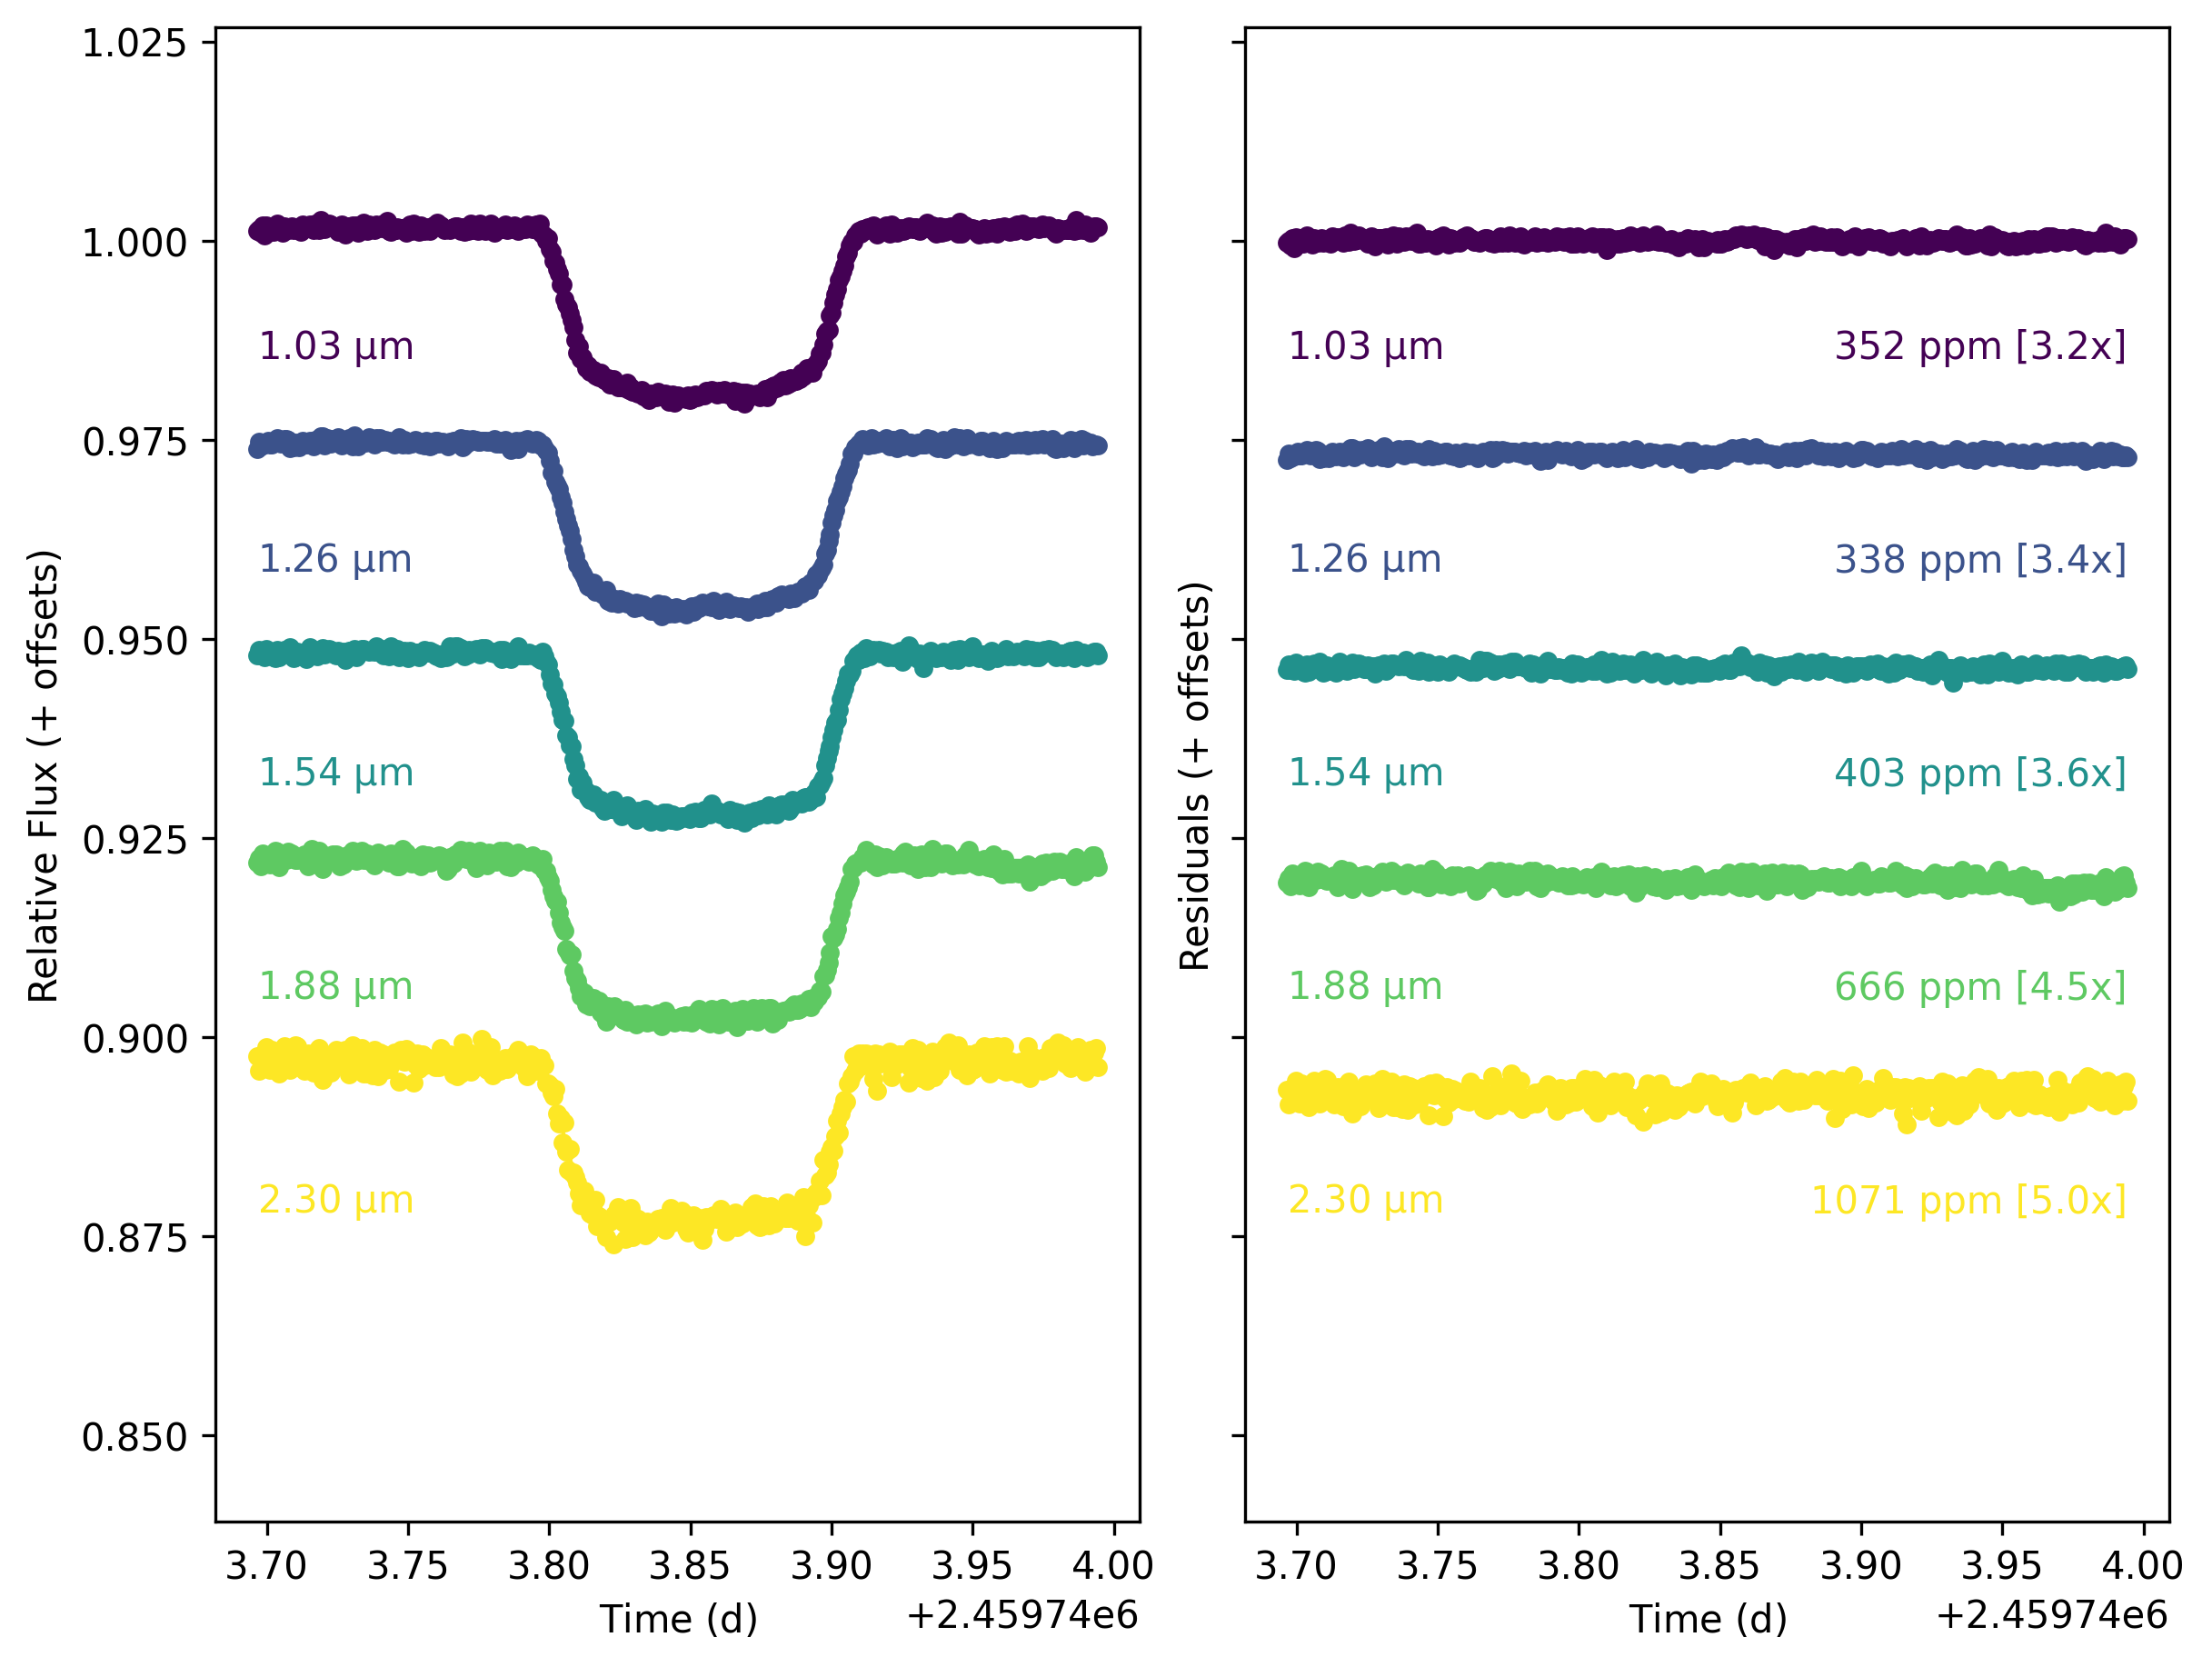

In [50]:
t.plot_with_model_and_residuals(histogram=False)

🌈🤖 'systematics_model' doesn't exist and will be skipped.



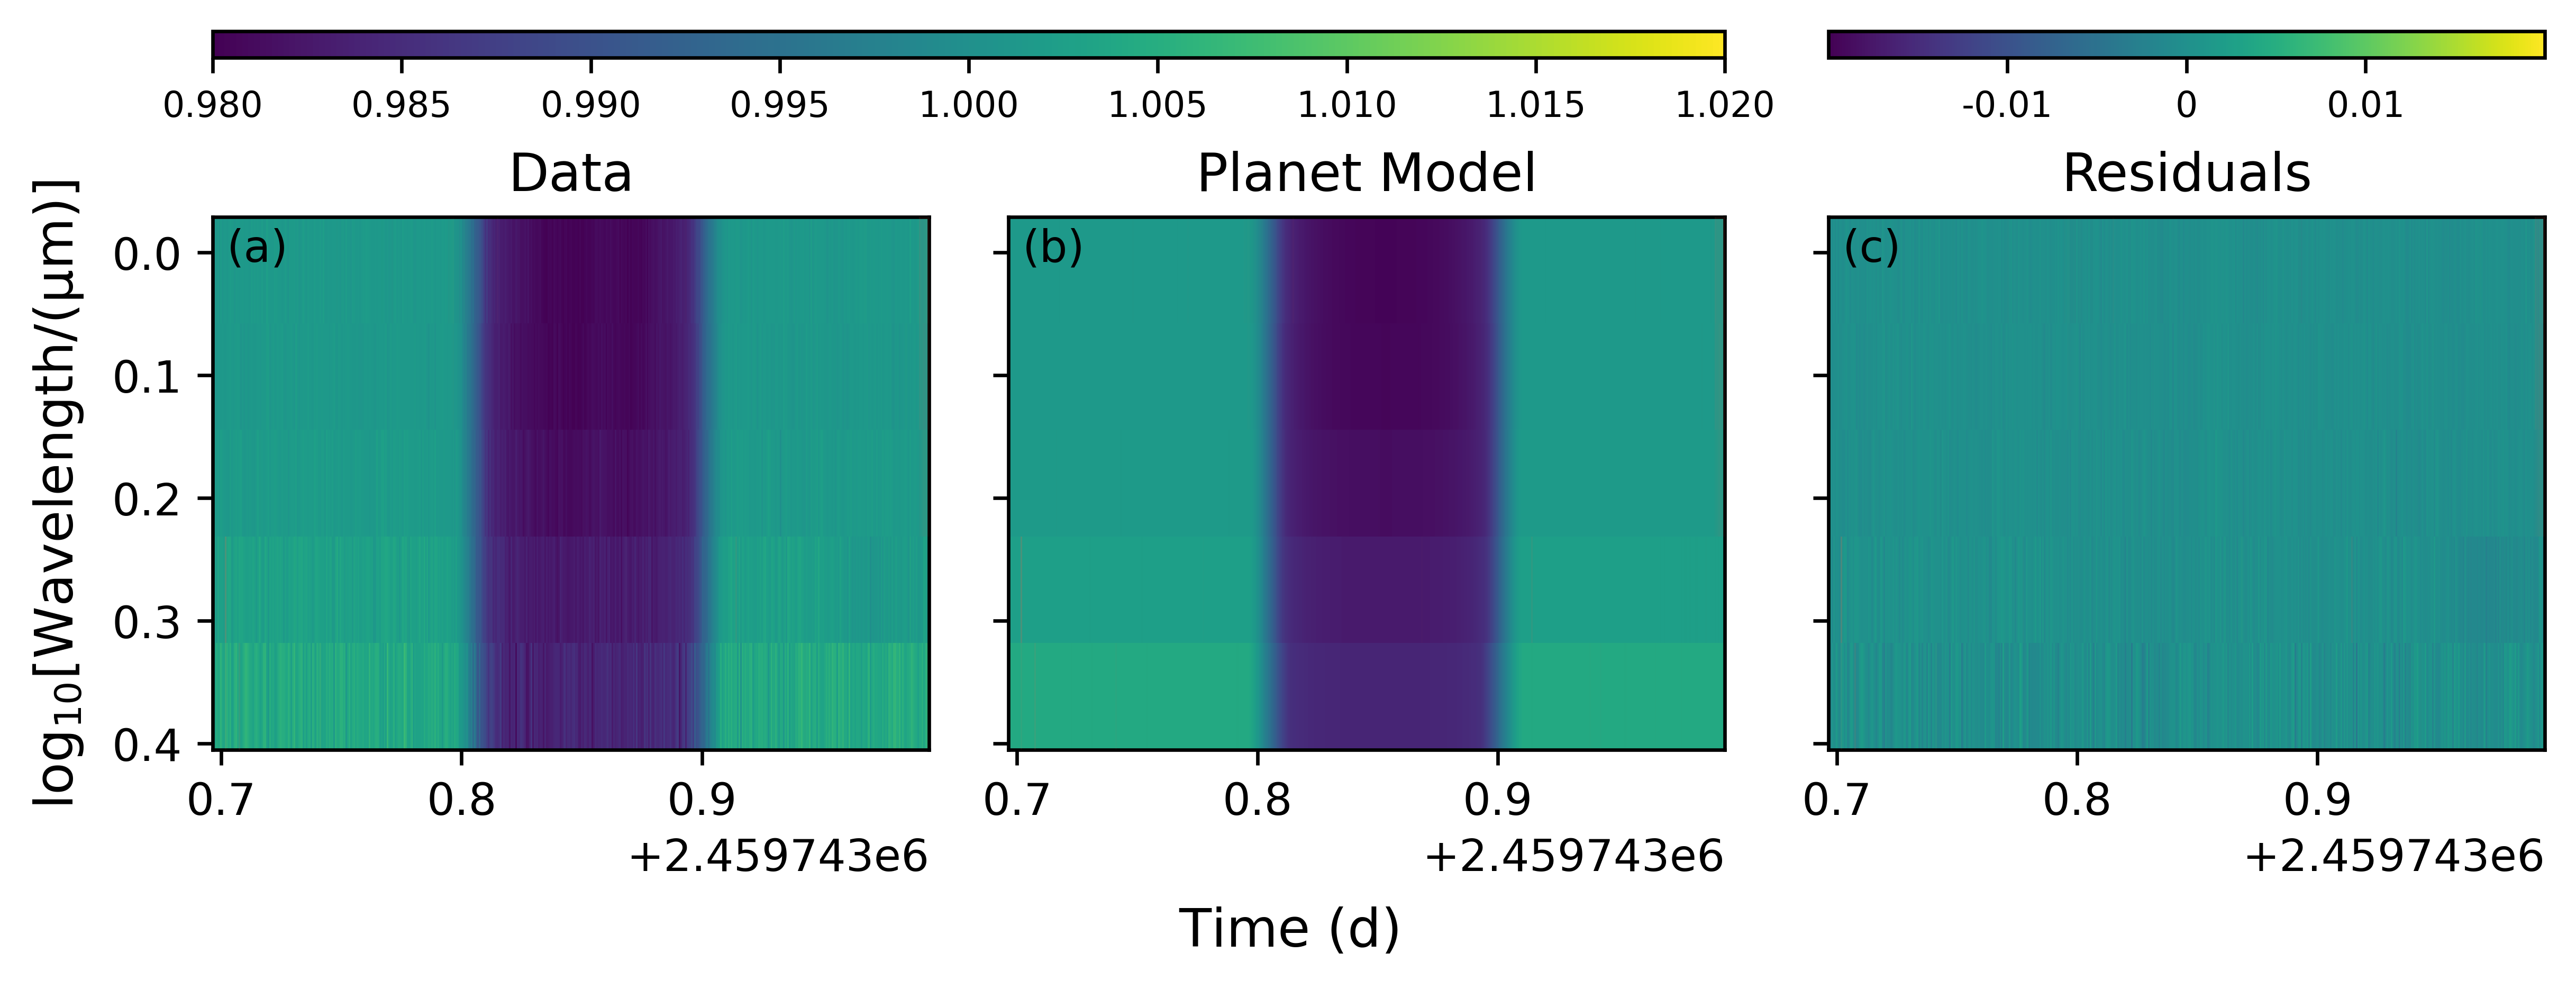

In [51]:
t.imshow_with_models()

In [52]:
t.corner_plot()

AttributeError: __enter__

In [34]:
t.plot_posteriors()

/Users/camu5866/opt/anaconda3/envs/spec_meeting/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/Users/camu5866/opt/anaconda3/envs/spec_meeting/lib/python3.9/site-packages/chromatic_fitting/models/transit.py:410: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_table[f"{self.name}_radius_ratio_neg_error"] = (


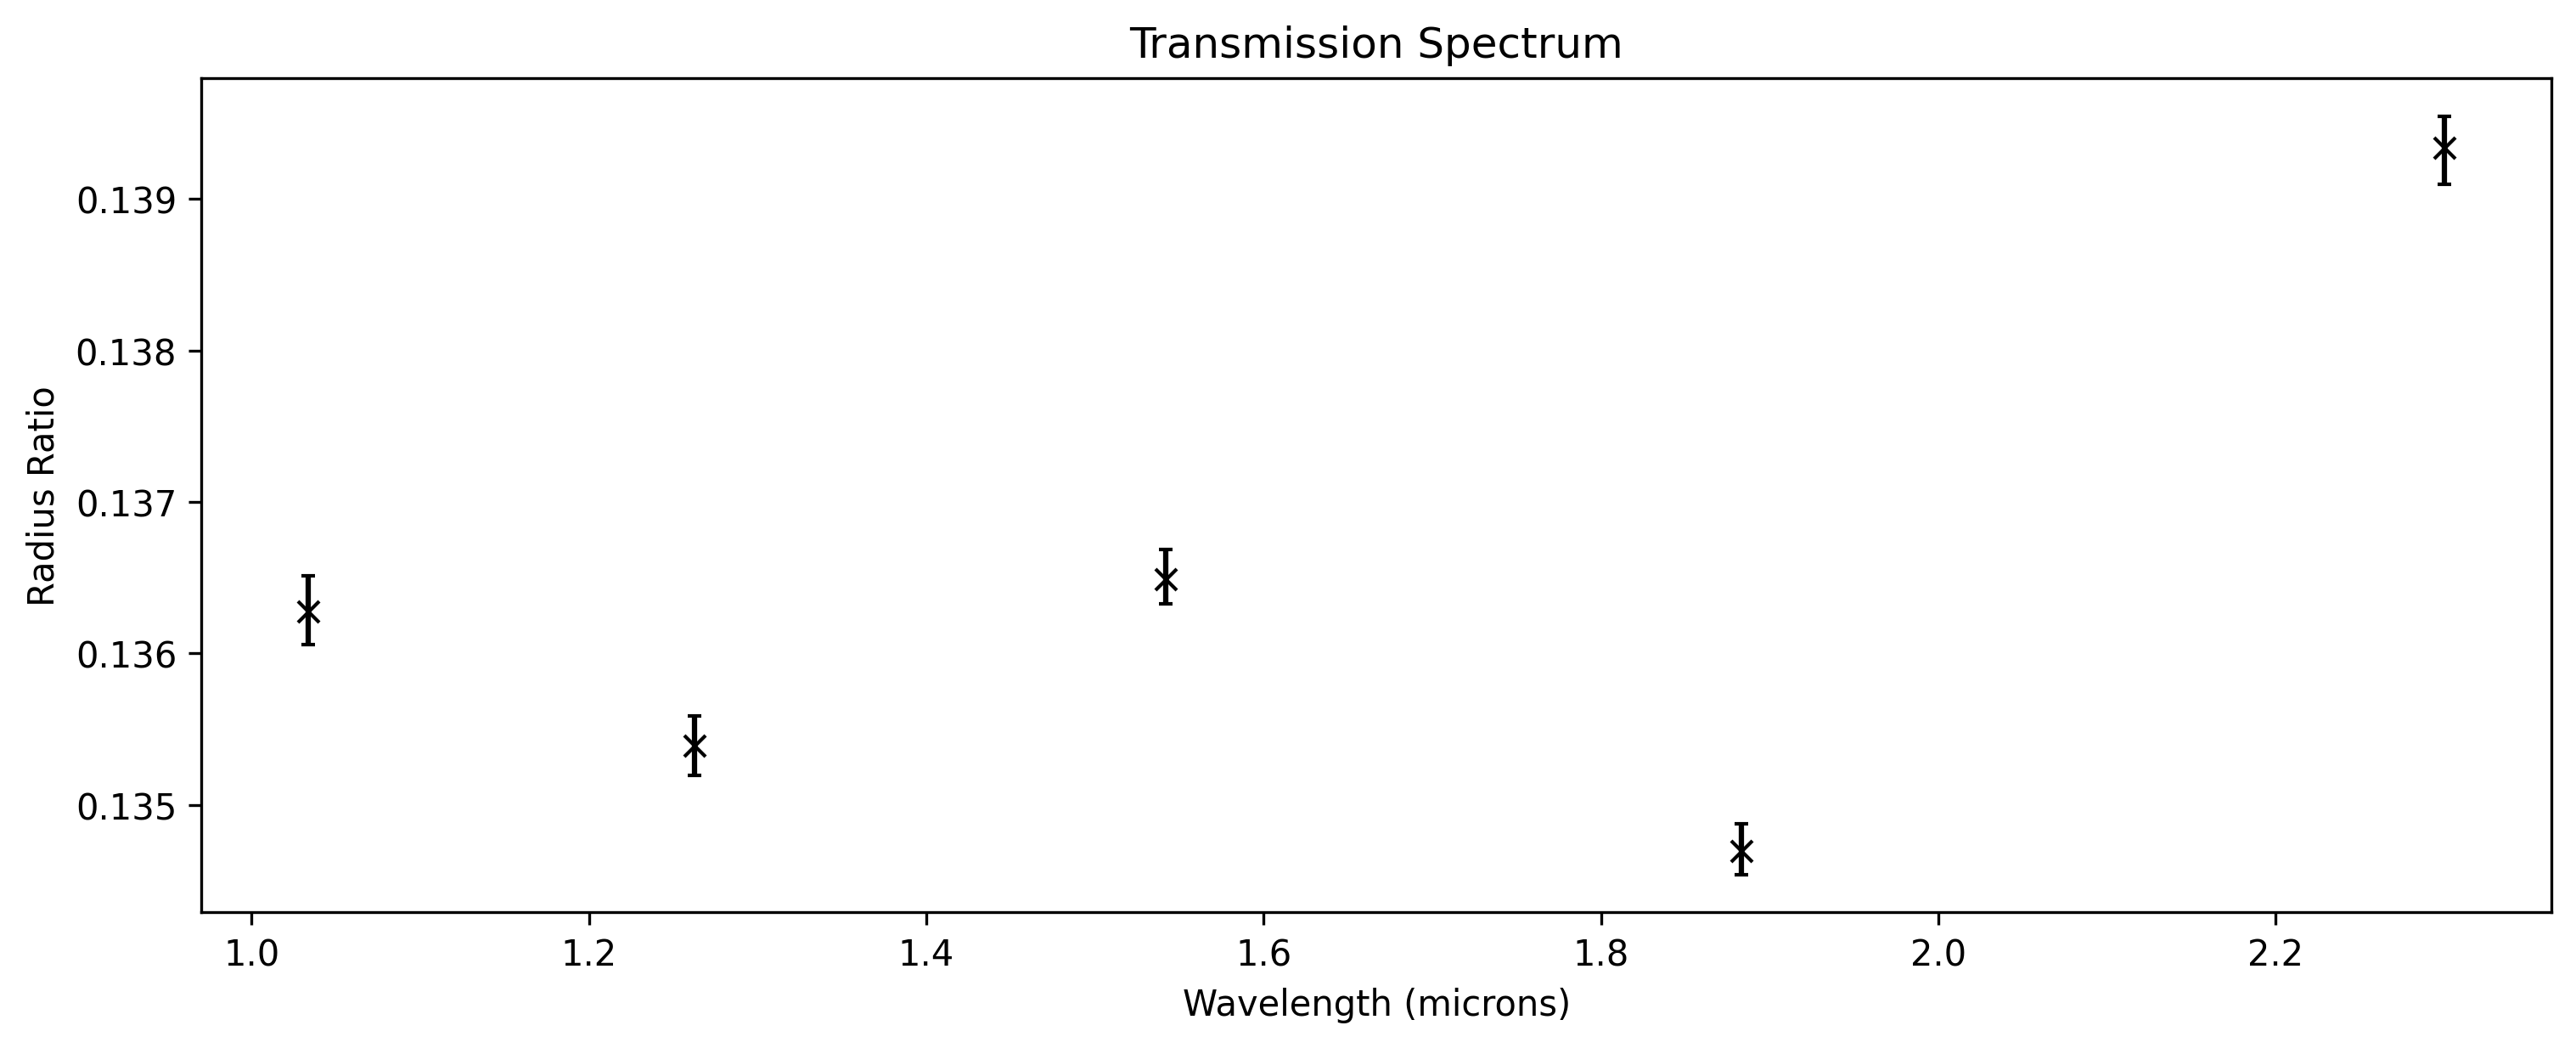

In [53]:
t.plot_transmission_spectrum(uncertainty=["hdi_16%", "hdi_84%"])